# Alzheimer Disease and Healthy Aging Data In US
选取第一个数据集是美国阿尔茨海默症和健康老龄化数据集

In [297]:
# 数据读取
import pandas as pd
data = pd.read_csv(r'D:\学习资料\数据挖掘\Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)


In [299]:
### 数据摘要
# 分析属性数据类型
print(data.dtypes)
pd.set_option('display.max_columns', 10)
data.head(5)

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Datasource                    object
Class                         object
Topic                         object
Question                      object
Data_Value_Unit               object
DataValueTypeID               object
Data_Value_Type               object
Data_Value                   float64
Data_Value_Alt               float64
Low_Confidence_Limit          object
High_Confidence_Limit         object
Sample_Size                  float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2       object
Stratification2               object
Geolocation                   object
ClassID                       object
TopicID                       object
QuestionID                    object
LocationID                     int64
StratificationCategoryID1     object
StratificationID1             object
S

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,...,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,...,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,...,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,...,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,...,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,...,18,AGE,AGE_OVERALL,GENDER,MALE


In [56]:
# 提取标称属性
# 注：由于在后续的分析中，发现Low_Confidence_Limit、High_Confidence_Limit俩个属性应当是数值属性，因此这里人为将这俩个属性的数据类型（object）转为float64
data["Low_Confidence_Limit"] = data["Low_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')
data["High_Confidence_Limit"] = data["High_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')
nominal_col = [i for i in data.dtypes._stat_axis.values.tolist() if data.dtypes[i]=='object']
print(nominal_col)
# 提取数值属性
value_col = [i for i in data.dtypes._stat_axis.values.tolist() if i not in nominal_col]
print(value_col)

['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']
['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'LocationID']


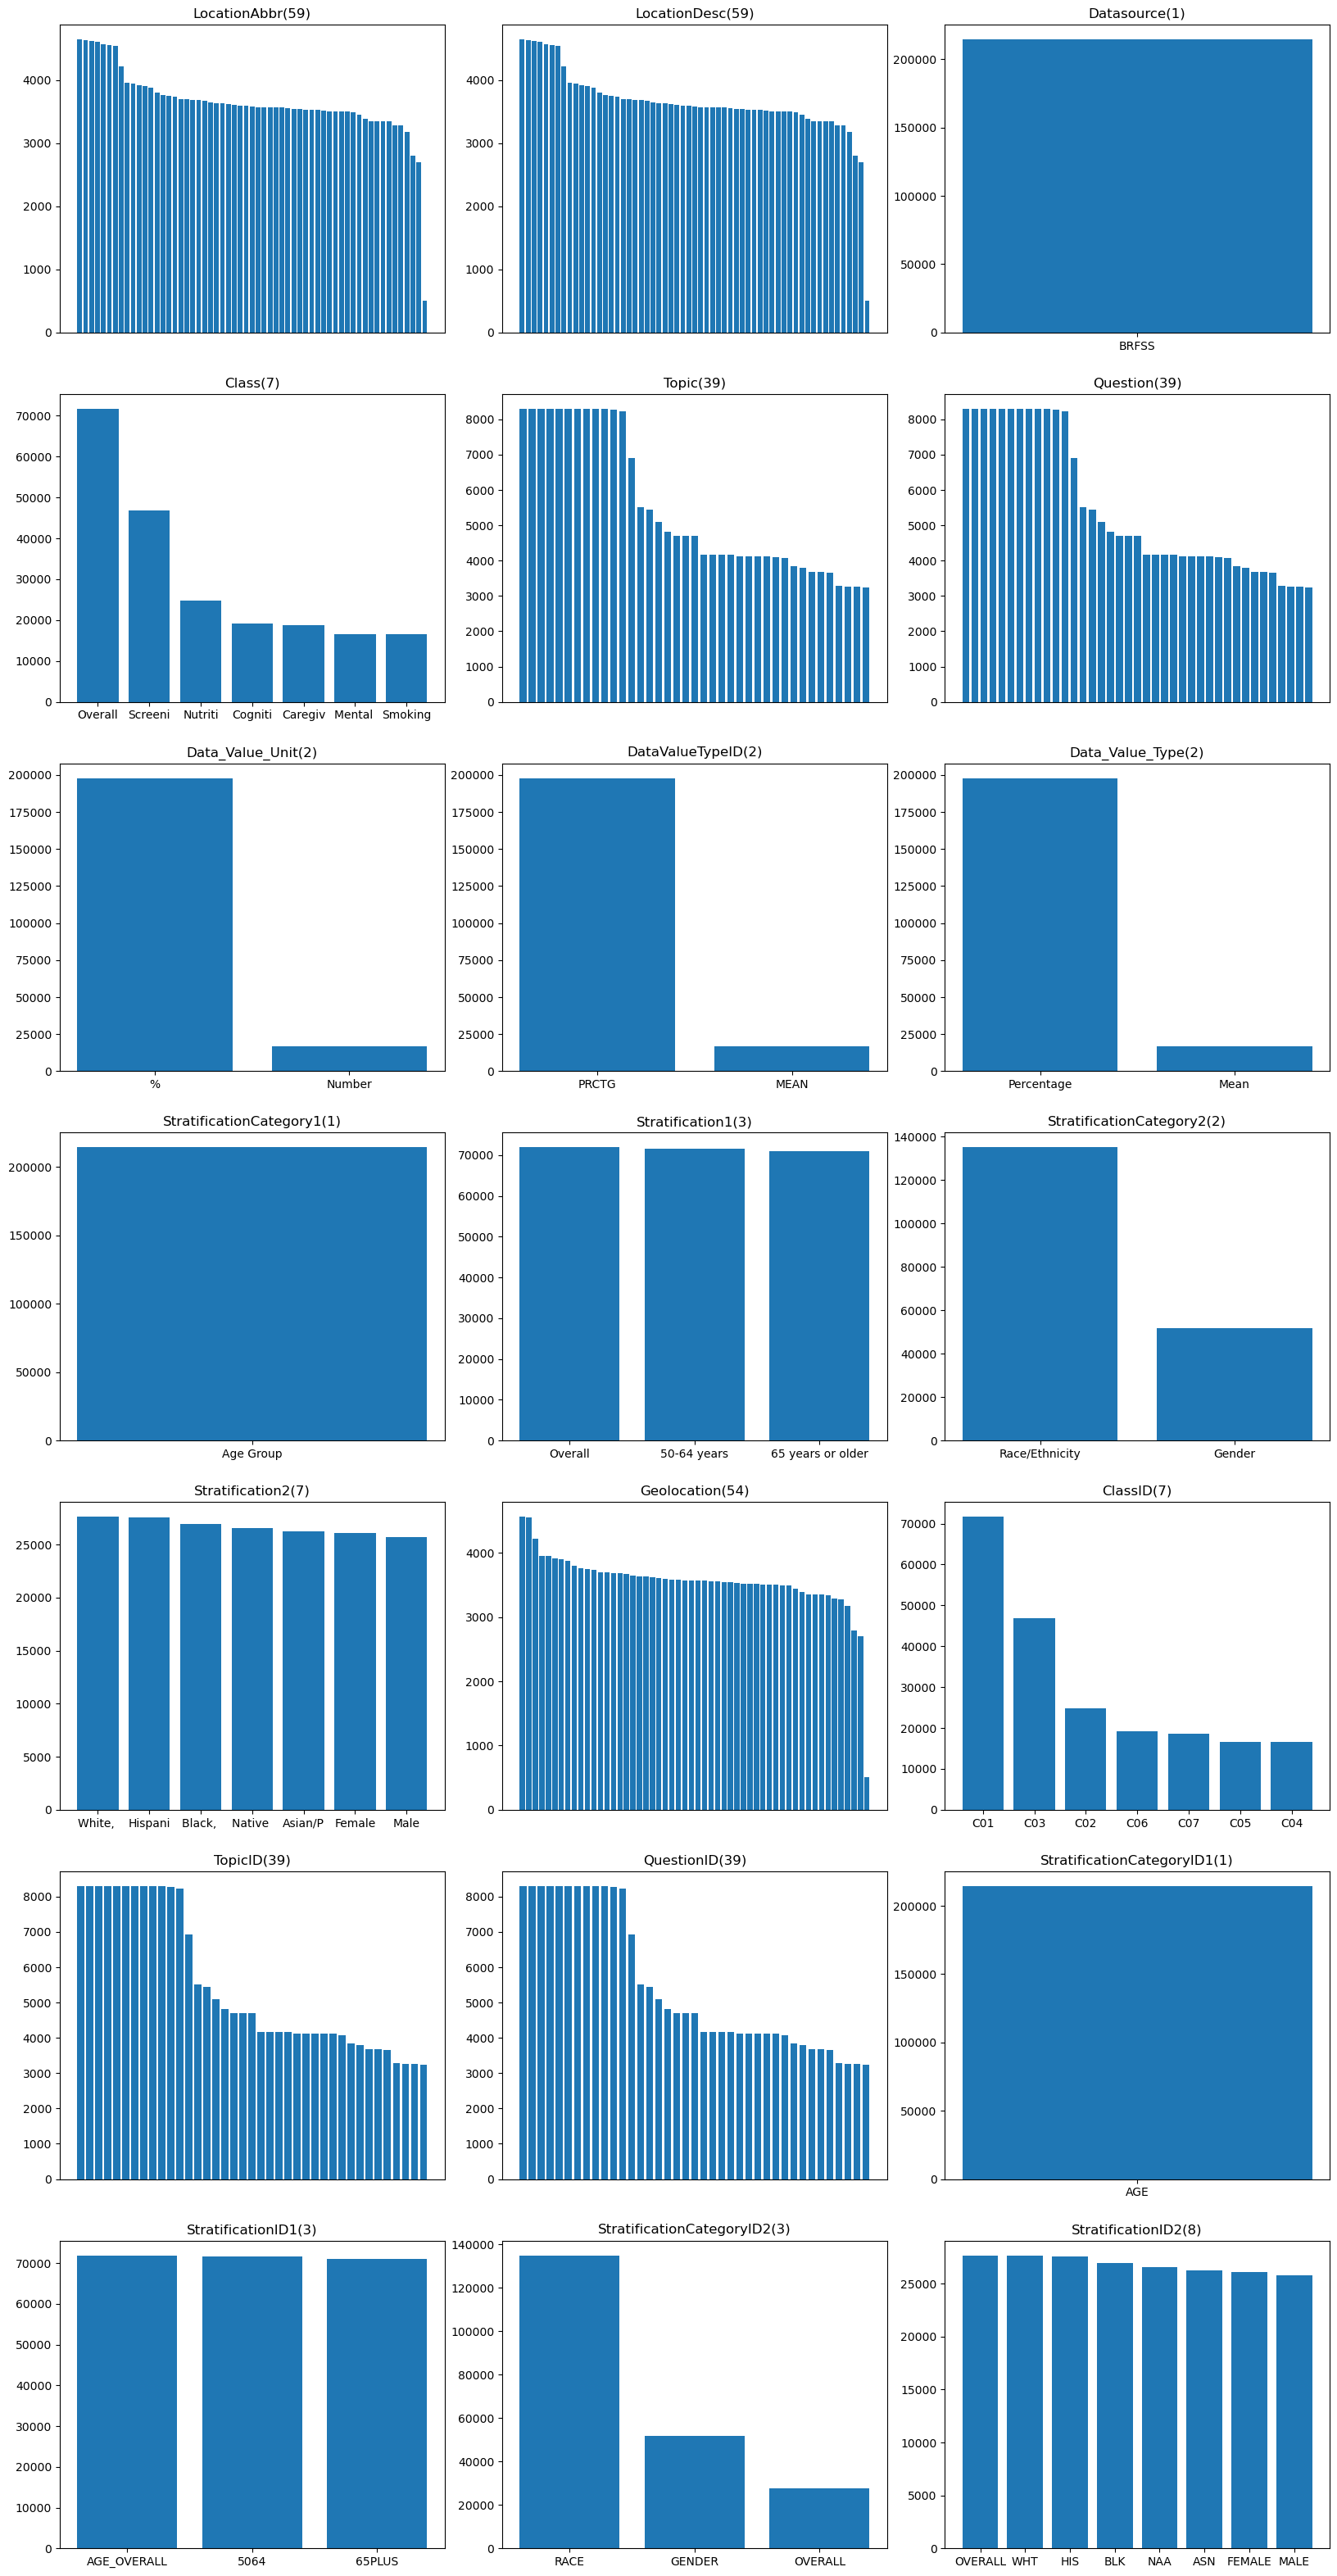

In [158]:
# 标称属性取值频数
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 40))
for i, col in enumerate(nominal_col):
    plt.subplot(7, 3, i+1)
    x = data[col].value_counts()._stat_axis.values.tolist()
    y = data[col].value_counts()[x]
    if col == 'Class' or col == 'Stratification2':
        x = [j[:7] for j in x]
    if len(x)>=10:
        plt.xticks([])
    plt.title(col+"("+str(len(x))+")")
    plt.bar(x, y)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
注：考虑到篇幅大小，部分标称属性取值过多、过长，因此显示时对部分属性取值名称进行了简化，对取值过多、过长的属性隐藏了横坐标轴，这不影响后续的分析。
结合频数柱状图和数据集前5行的实例以及Kaggle官网的简介，对各标称属性有如下分析：
LocationAbbr和LocationDesc表示数据收集的地点，前者为简写，后者为全称，根据统计可见该数据集从59个不同地点收集得来；

DataSource表示数据来源，只有一个取值BRFSS，这意味着所有数据都来自美国CDC（疾病控制与预防中心）的BRFSS（行为危险因素监测系统）；

Class表示数据类型，含7种值：Overall Health（整体健康）、Screenings and Vaccines（筛查和疫苗）、
Nutrition/Physical Activity/Obesity（营养/体育活动/肥胖）、Cognitive Decline（认知能力下降）、Caregiving（看护）、Mental Health（心理健康）、Smoking and Alcohol Use（吸烟和饮酒） ，其中主要数据都为整体健康或筛查和疫苗，其它类型的数据较少；

Topic表示数据的主题，描述该条数据是具体关于哪一方面疾病或健康风险的，有39个取值，例如有Prevalence of sufficient sleep（睡眠充足率），意为该条数据表征了某地区某位被调查者睡眠充足率的统计结果；

Question表示该条数据的主题关注哪种健康问题，该属性的取值和频数和Topic保持一致，可见其与Topic是一一对应的，例如Topic的Prevalence of sufficient sleep（睡眠充足率）对应Question为Percentage of older adults getting sufficient sleep (>6 hours)（老年人获得充足睡眠的百分比（>6小时））；

Data_Value_Unit表示该条数据的数值单位，只有2个取值：%和Number，意为数据代表百分数值还是数值本身，其中92%的数据单位都是%，可见该数据集主要描述的是百分数数据；

DataValueTypeID表示该条数据的数值类型ID，同样只有2个取值：PRCTG和MEAN，分别意为百分数和均值，该属性与Data_Value_Unit一一对应；

Data_Value_Type表示该条数据的数值类型，属于是DataValueTypeID的扩写，与其一一对应，取值分别为Percentage和Mean；

StratificationCategory1表示第一种分类依据，只有一个取值Age Group，这表示所有数据都是按年龄进行第一次分类的；

Stratification1表示使用第一种分类依据的类型，有3个取值：Overall（整体）、50-64years、65 years or older，每种取值频数相同，可见对所有topic都进行了三种分类的统计；

StratificationCategory2表示第二种分类依据，有2个取值：Race/Ethnicity（种族/民族）、Gender（性别），表示在第一种分类基础上，同时对种族/民族或性别进行了分类，由于这两个取值频数并不相等，笔者表示非常纳闷，这说明有些数据只统计了被调查者的种族/民族，而没有统计性别，不知调查者是何意，另外该属性的取值频数远小于其它属性，可见该属性有大量的缺失值，可见该属性在调查时可能只是作为辅助分类依据，因此没有全范围的调查；

Stratification2表示使用第二种分类依据的类型，有7个取值：White, non-Hispanic（白人，非西班牙裔）、Hispanic（西班牙裔）、Black, non-Hispanic（黑人，非西班牙裔）、Asian/Pacific Islander（亚洲人/太平洋岛民）、Native Am/Alaskan Native（原住民/阿拉斯加原住民），这5个取值对应StratificationCategory2的Race/Ethnicity（种族/民族）取值，剩下2个取值：Female、Male对应StratificationCategory2的Gender（性别）取值。该属性取值频数接近，可见调查统计时做到了均匀取样；

Geolocation表示调查数据调查时的地理经纬度坐标，有12%的数据缺失该属性，其余数据包含54个取值，每个取值的频数接近，可见调查时的地域分布均匀；

ClassID、TopicID、QuestionID分别表示数据分类、主题、问题的ID，其属性取值分别与Class、Topic、Question属性取值一一对应；

StratificationCategory1ID、Stratification1ID、StratificationCategory2ID、Stratification2ID分别表示各分类依据和按照依据分类的类型ID，其属性取值分别与StratificationCategory1、Stratification1、StratificationCategory2、Stratification2属性取值一一对应。


In [58]:
# 数值属性五数概述、缺失值个数
for i in value_col:
    print("-------------"+i+"-------------")
    print("Min(最小值):"+str(min(data[i])))
    print("Q1(第一四分位数):"+str(data[i].quantile(q=0.25,interpolation='linear')))
    print("Q2(中位数):"+str(data[i].quantile(q=0.5,interpolation='linear')))
    print("Q3(第三四分位数):"+str(data[i].quantile(q=0.75,interpolation='linear')))
    print("Max(最大值):"+str(max(data[i])))
    print("缺失值个数:"+str(data[i].isna().sum()))

-------------YearStart-------------
Min(最小值):2015
Q1(第一四分位数):2016.0
Q2(中位数):2017.0
Q3(第三四分位数):2019.0
Max(最大值):2020
缺失值个数:0
-------------YearEnd-------------
Min(最小值):2015
Q1(第一四分位数):2016.0
Q2(中位数):2018.0
Q3(第三四分位数):2019.0
Max(最大值):2020
缺失值个数:0
-------------Data_Value-------------
Min(最小值):0.0
Q1(第一四分位数):15.3
Q2(中位数):32.5
Q3(第三四分位数):56.8
Max(最大值):100.0
缺失值个数:69833
-------------Data_Value_Alt-------------
Min(最小值):0.0
Q1(第一四分位数):15.3
Q2(中位数):32.5
Q3(第三四分位数):56.8
Max(最大值):100.0
缺失值个数:69833
-------------Low_Confidence_Limit-------------
Min(最小值):0.0
Q1(第一四分位数):12.0
Q2(中位数):26.9
Q3(第三四分位数):49.1
Max(最大值):99.6
缺失值个数:70009
-------------High_Confidence_Limit-------------
Min(最小值):1.4
Q1(第一四分位数):19.0
Q2(中位数):38.5
Q3(第三四分位数):64.7
Max(最大值):100.0
缺失值个数:70009
-------------Sample_Size-------------
Min(最小值):nan
Q1(第一四分位数):nan
Q2(中位数):nan
Q3(第三四分位数):nan
Max(最大值):nan
缺失值个数:214462
-------------LocationID-------------
Min(最小值):1
Q1(第一四分位数):18.0
Q2(中位数):33.0
Q3(第三四分位数):49.0
Max(最大值):9004
缺失值个数:0


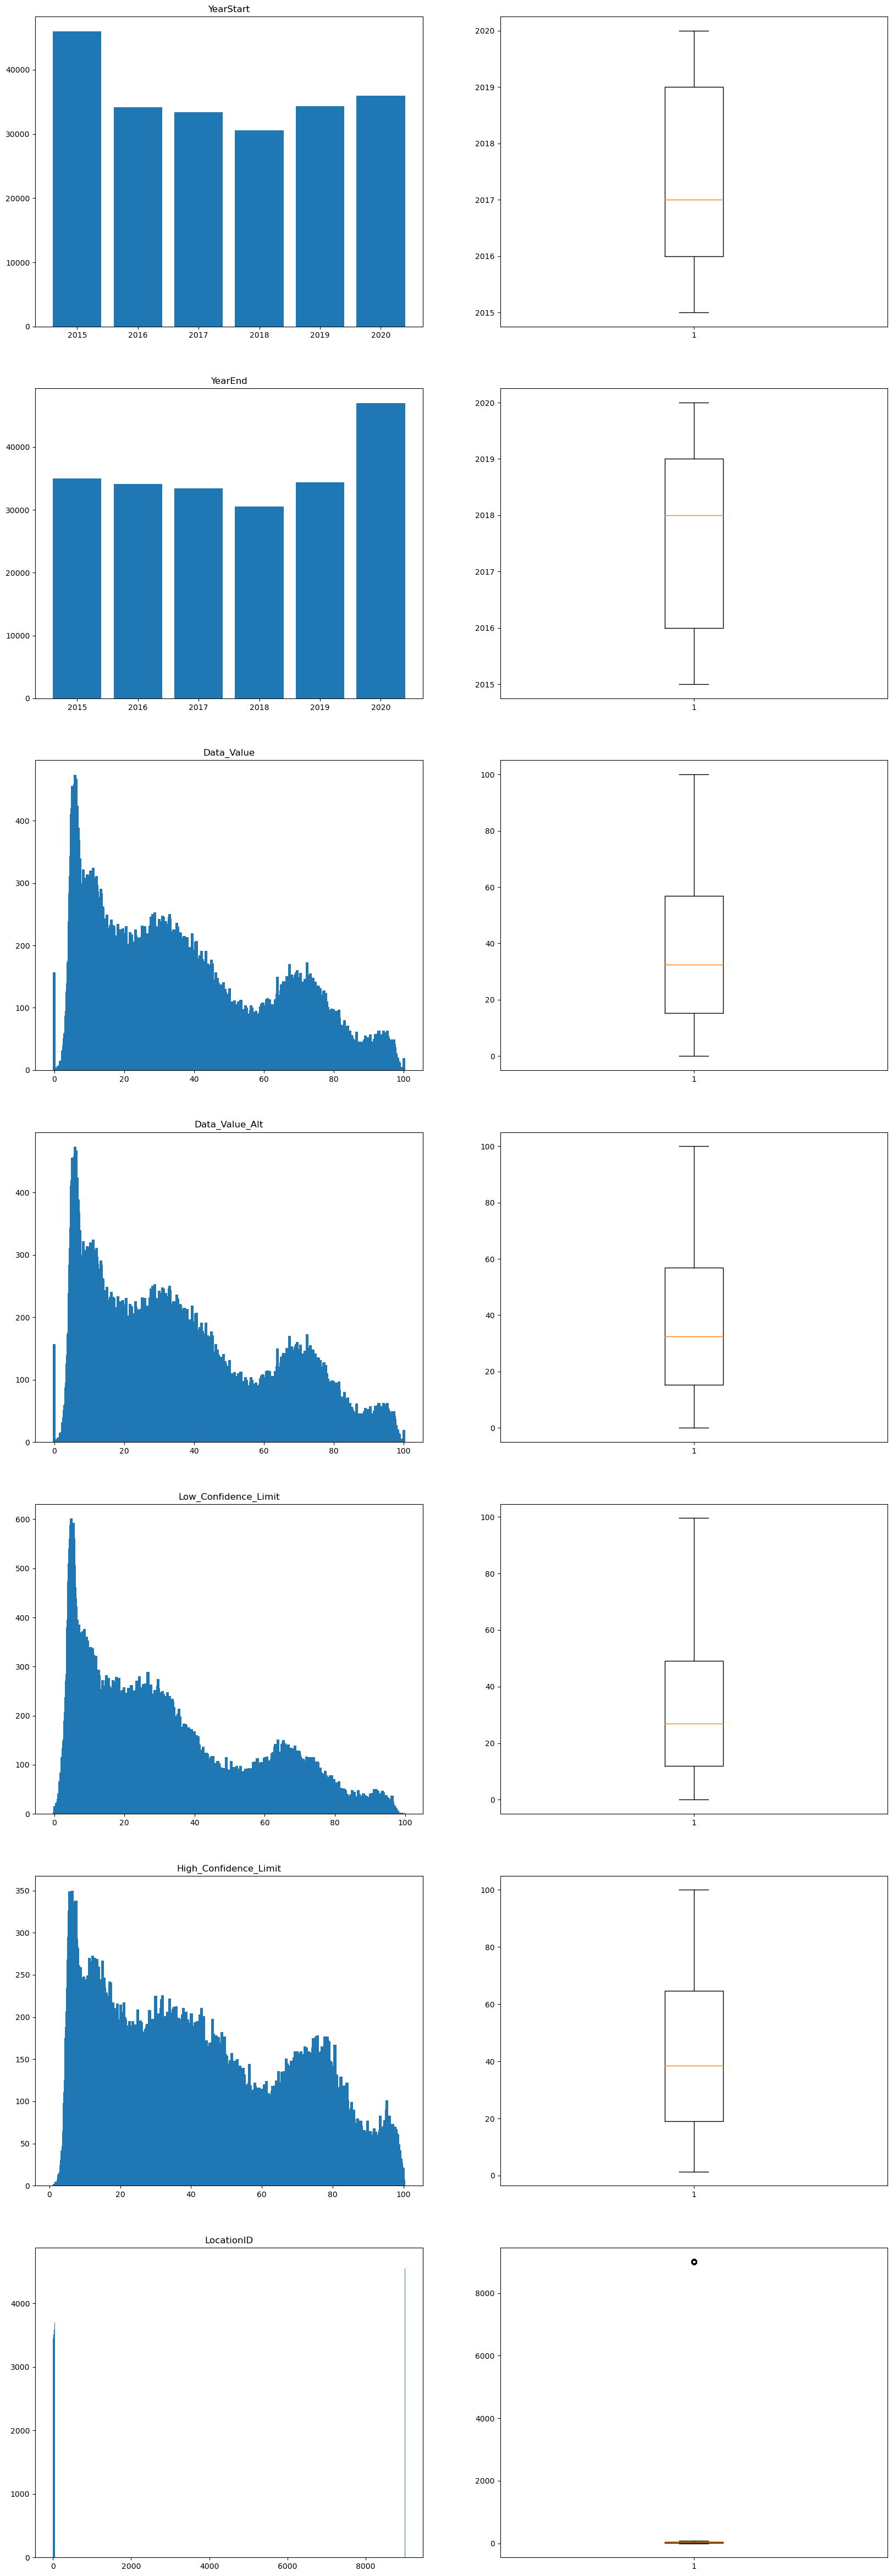

In [198]:
### 数据可视化
# 直方图统计&盒图

plt.figure(figsize=(20, 60))
for i, col in enumerate(value_col):
    plt.subplot(7, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.bar(x, y)
    plt.subplot(7, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
针对Year_Start、Year_End属性，Min都为2015，Max都为2020，可见该数据集只收集了2015-2020年度的数据，同时考虑到Year_Start的Q1、Q2、Q3，可以得出各年度数据基本分布均匀的结论，但2017年之前的数据略多，2018年度的数据略少；

Data_Value表示该条数据具体值，由前述分析并结合直方图分析，可见该属性需要和Data_Value_Type同时处理才有意义，离群值均表示平均值的数据类型，不含百分数单位，而其它大部分数据单位是百分数，因此取值较大；

Data_Value_Alt表示备用数据值，由五数概述和直方图可知，该属性取值和Data_Value完全对应，取值也相同，可见在数据采集时并未使用到备用数据值，因此后续缺失值处理没有考虑该属性，可直接参考Data_Value；

Low_Confidence_Limit表示数据值的置信区间的下限，由直方图和盒图可知，该属性相当一部分数据在40%以下，可见大部分数据置信度不高；

High_Confidence_Limit表示数据值的置信区间的上限，其数据分布较Low_Confidence_Limit相对要均匀，可见相当一部分数据置信度上限还比较高；

LocationID表示调查地区的ID，明显可以看出9001-9004是离群值，可能是由于统计错误造成的；

YearStart、YearEnd、LocationID属性都没有缺失，Data_Value和Data_Value_Alt缺失了相同个数，可见这俩个属性是极度相关的，Sample_Size竟然在所有实例上都缺失了，可见该属性是无用属性，后续分析将不考虑该属性。

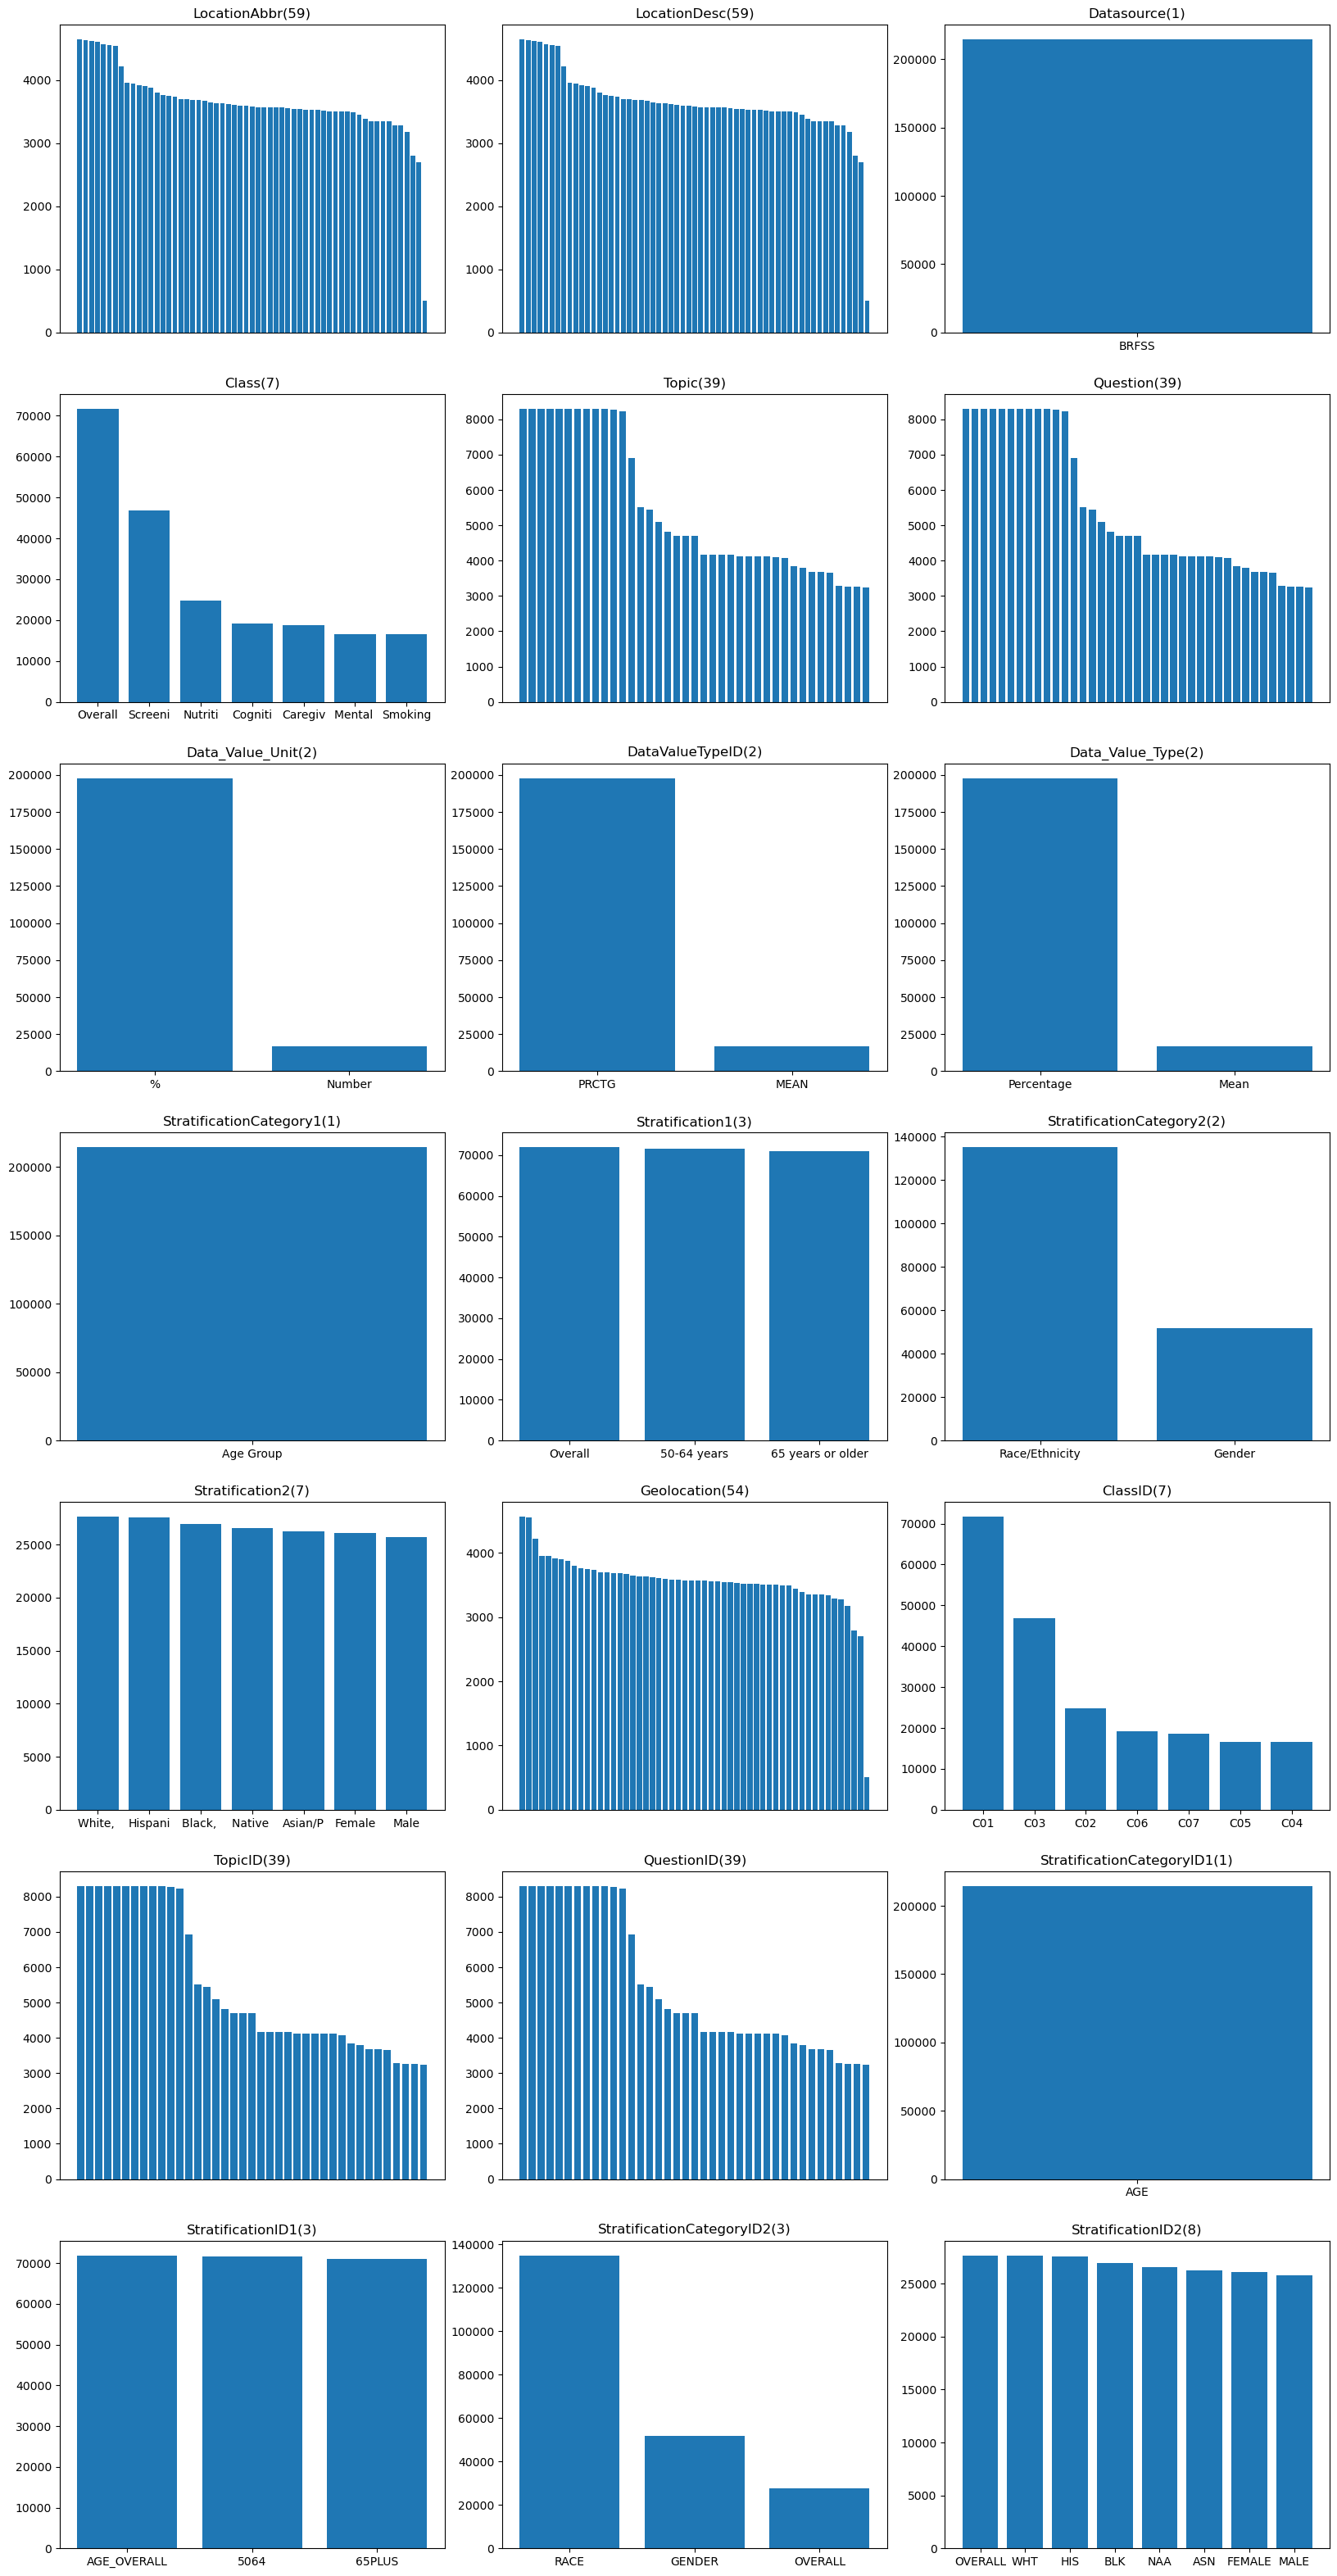

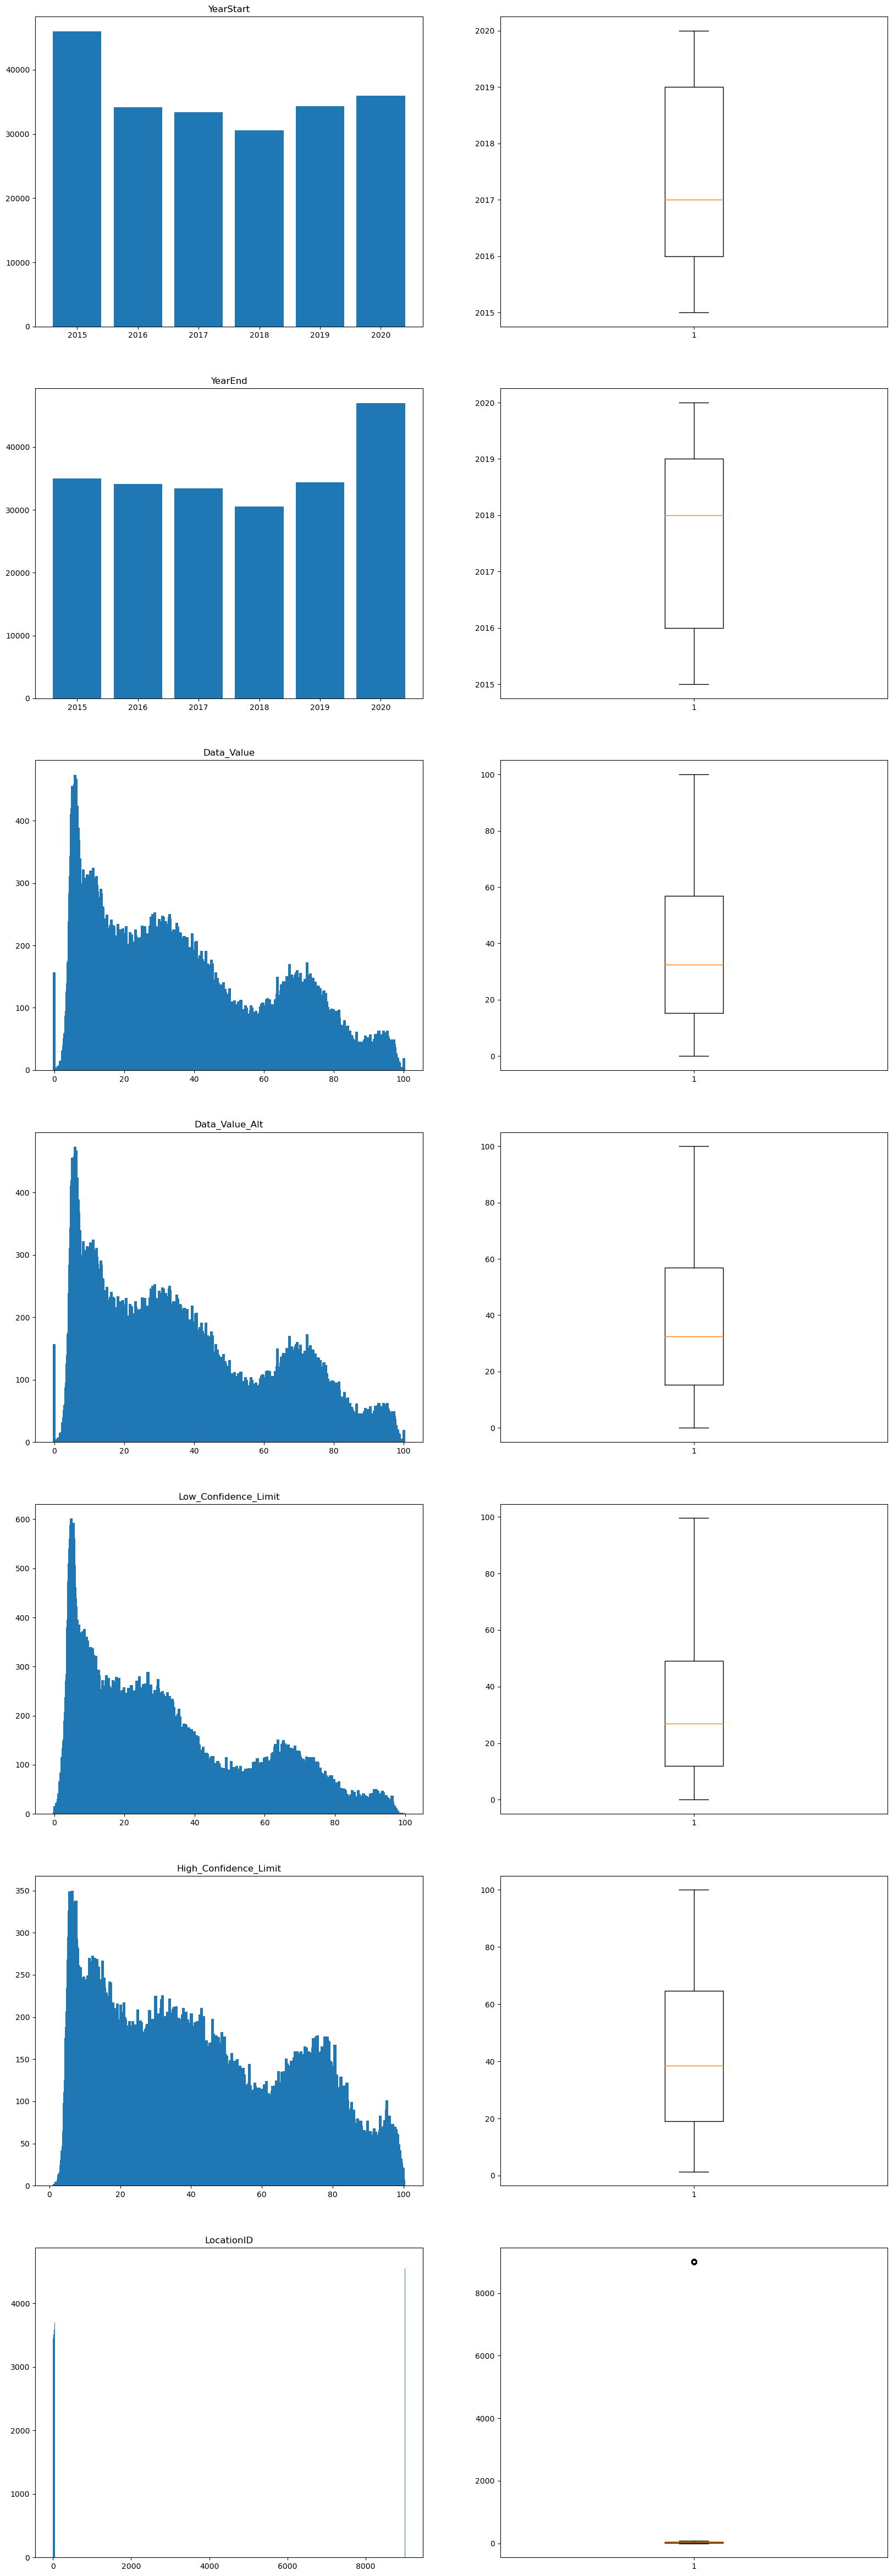

In [199]:
### 缺失值处理，针对缺失数据的数值属性：Data_Value、Low_Confidence_Limit、High_Confidence_Limit进行缺失值处理
process_col = ["Data_Value", "Low_Confidence_Limit", "High_Confidence_Limit"]
# 将缺失部分剔除
data.dropna(axis=0,subset = process_col)
plt.figure(figsize=(20, 40))
for i, col in enumerate(nominal_col):
    plt.subplot(7, 3, i+1)
    x = data[col].value_counts()._stat_axis.values.tolist()
    y = data[col].value_counts()[x]
    if col == 'Class' or col == 'Stratification2':
        x = [j[:7] for j in x]
    if len(x)>=10:
        plt.xticks([])
    plt.title(col+"("+str(len(x))+")")
    plt.bar(x, y)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()
plt.figure(figsize=(20, 60))
for i, col in enumerate(value_col):
    plt.subplot(7, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.bar(x, y)
    plt.subplot(7, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果将缺失部分剔除，经过观察修改过后各属性的直方图和盒图，可以看到对数据集属性各分布几乎没有影响，这可能是由于缺失值对应其它属性的取值分布比较均匀导致的。

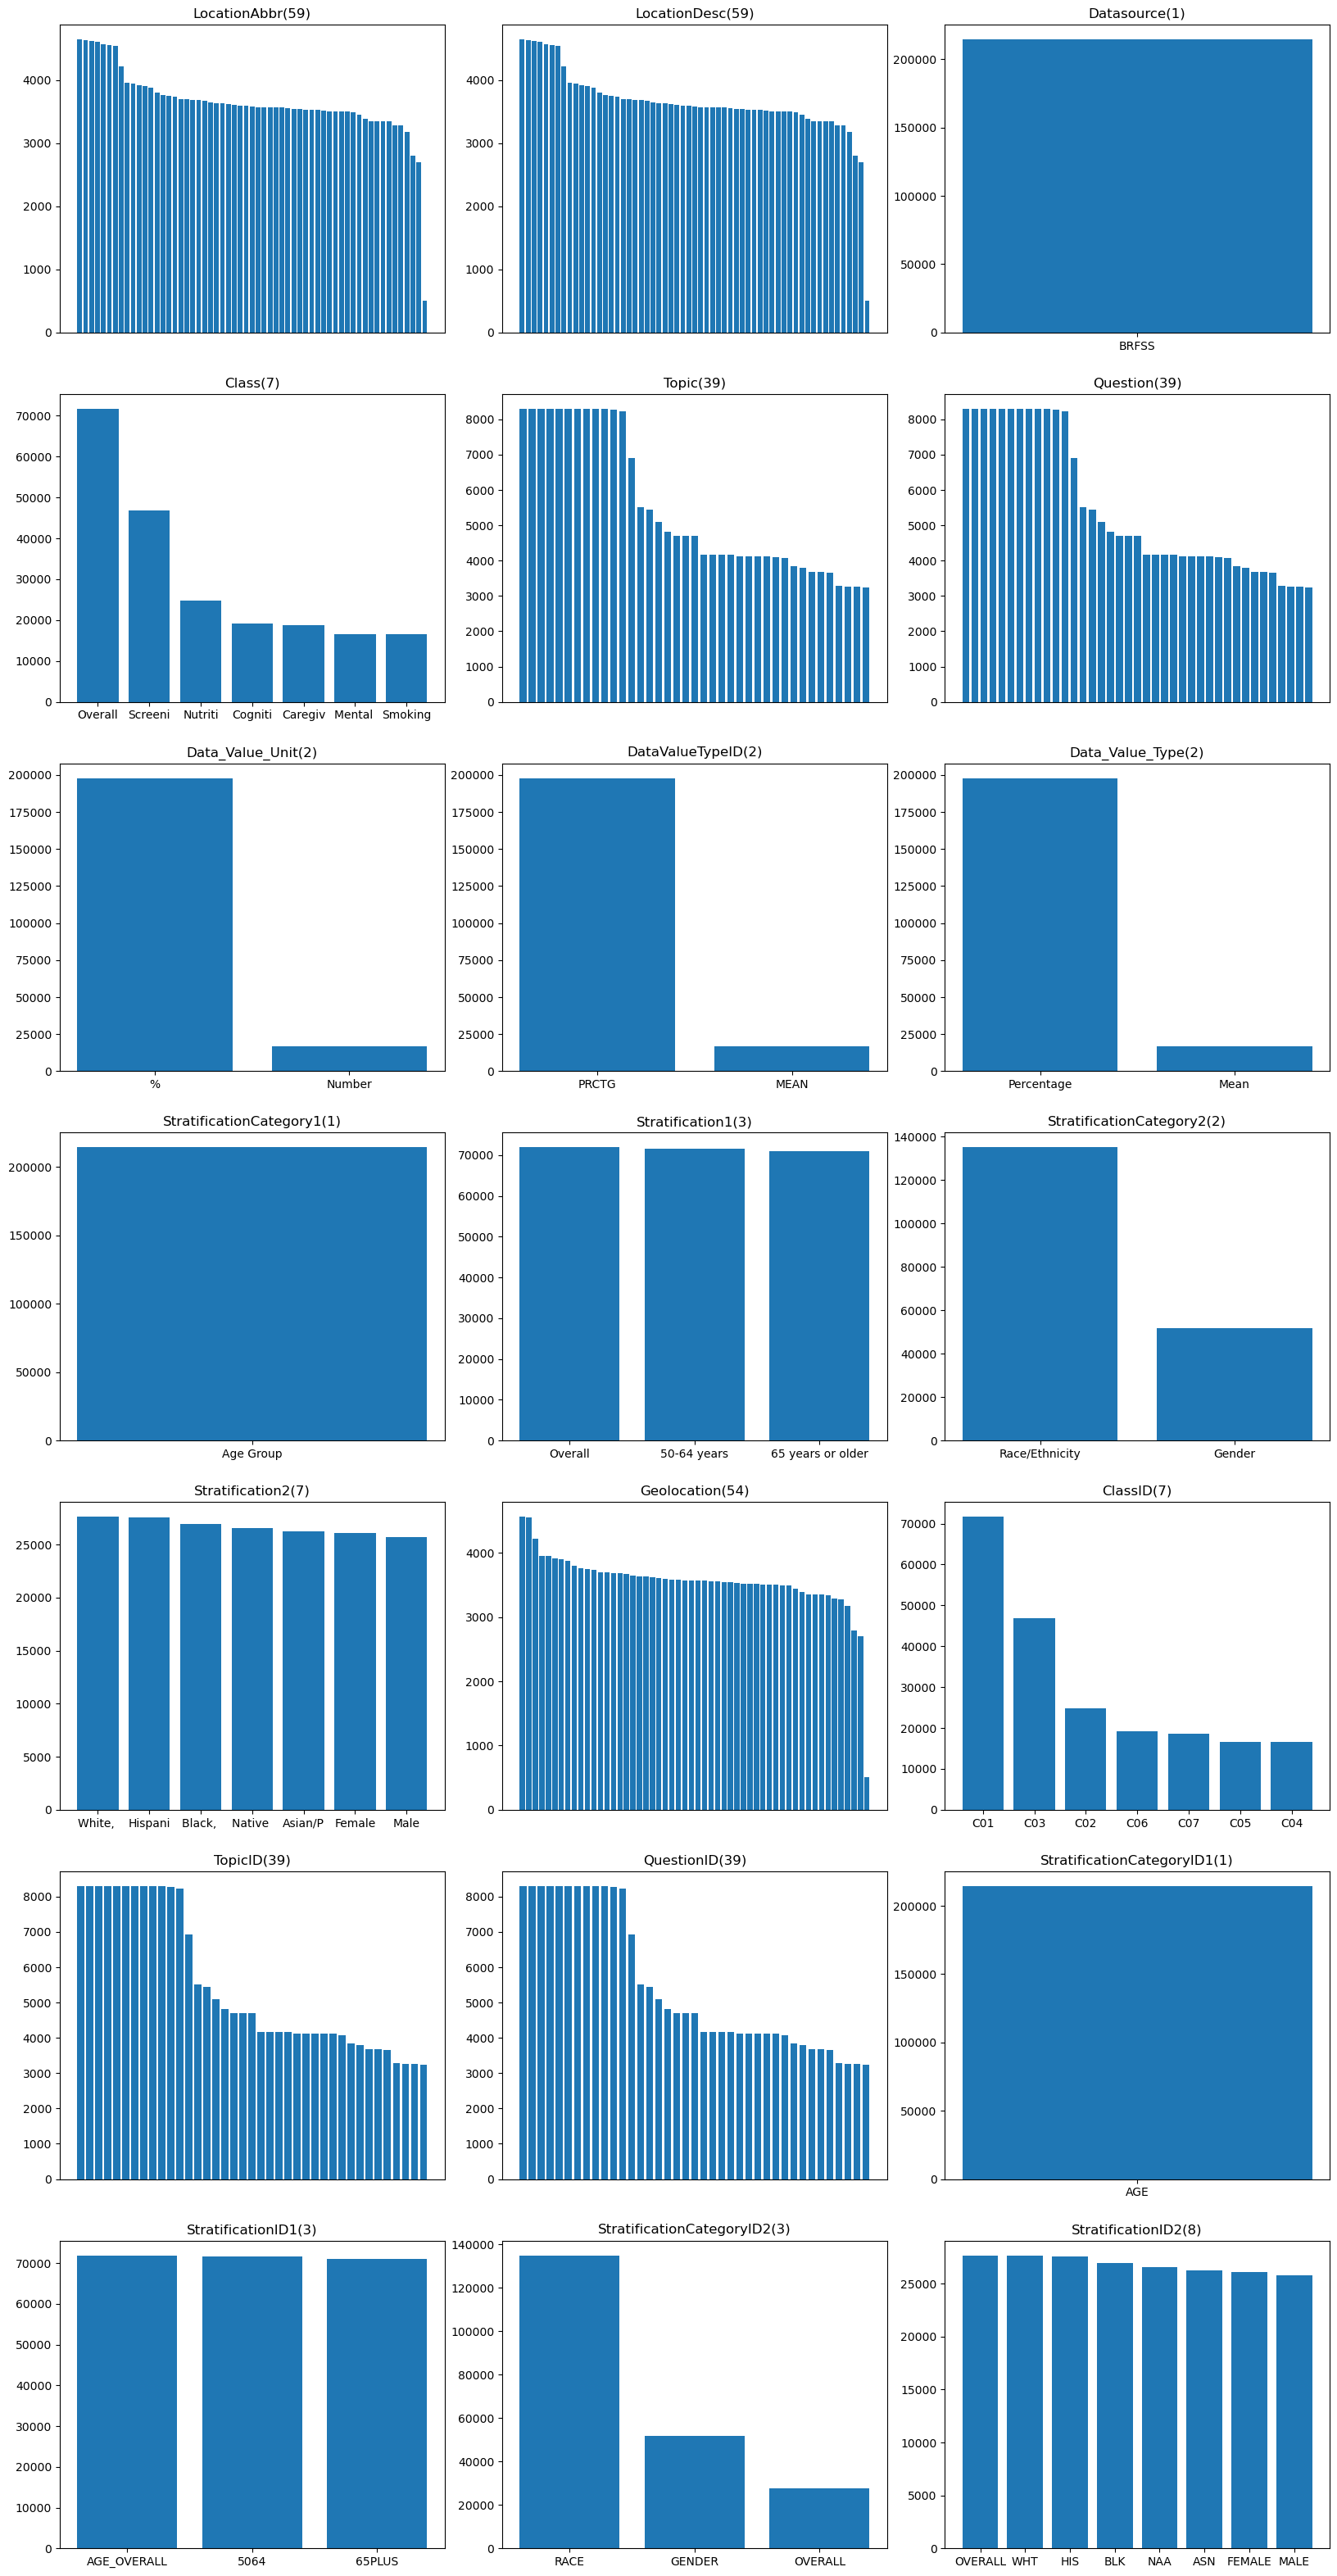

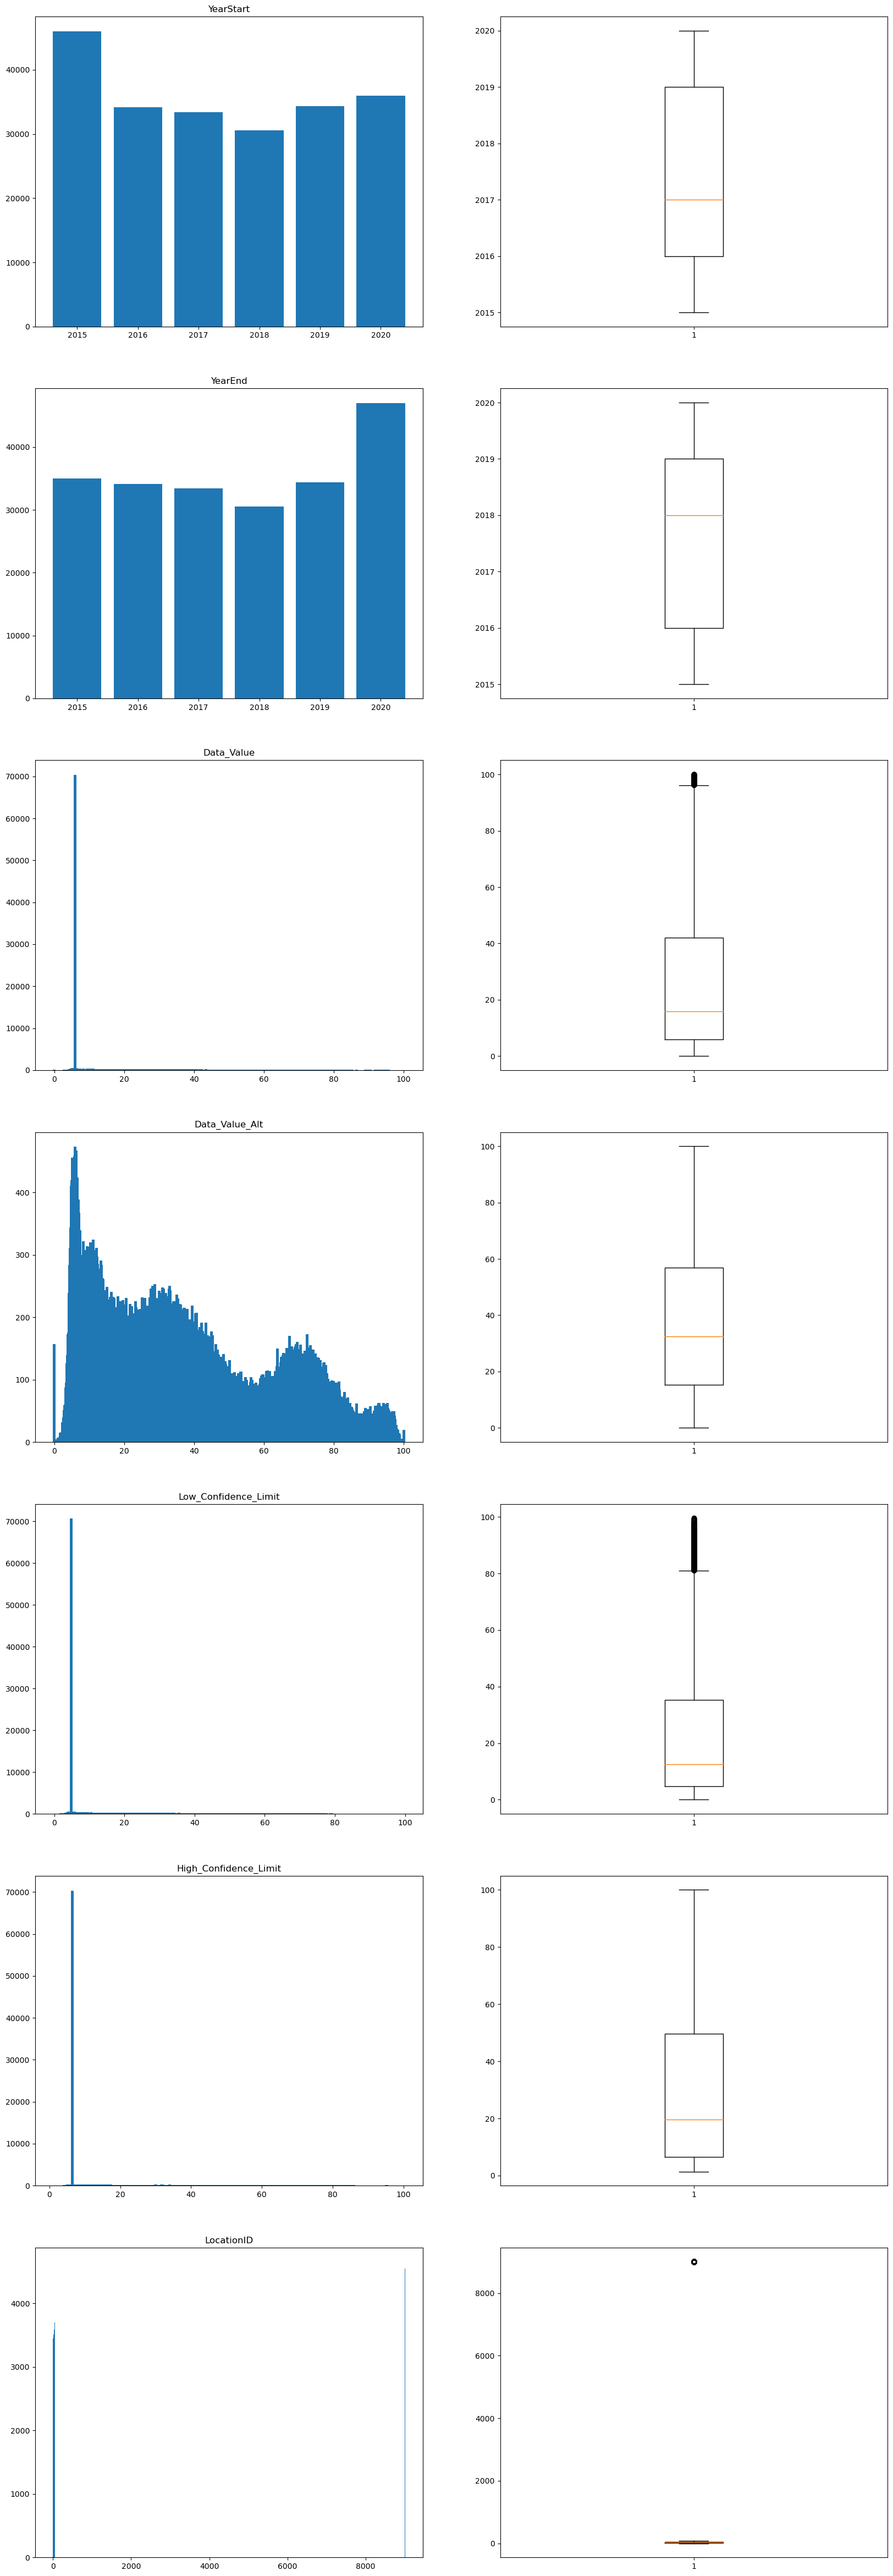

In [216]:
# 用最高频率值来填补缺失值
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv(r'D:\学习资料\数据挖掘\Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)
data["Low_Confidence_Limit"] = data["Low_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')
data["High_Confidence_Limit"] = data["High_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')
for i in process_col:
    data[i][np.isnan(data[i])] = data[i].mode()[0]
plt.figure(figsize=(20, 40))
for i, col in enumerate(nominal_col):
    plt.subplot(7, 3, i+1)
    x = data[col].value_counts()._stat_axis.values.tolist()
    y = data[col].value_counts()[x]
    if col == 'Class' or col == 'Stratification2':
        x = [j[:7] for j in x]
    if len(x)>=10:
        plt.xticks([])
    plt.title(col+"("+str(len(x))+")")
    plt.bar(x, y)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()
plt.figure(figsize=(20, 60))
for i, col in enumerate(value_col):
    plt.subplot(7, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.bar(x, y)
    plt.subplot(7, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果用最高频率值来填补缺失值，经过观察修改过后各属性的直方图和盒图，可以看到这一操作极大影响了数据集的分布，这可能与缺失值占比过大（70009/214462）导致的，另一方面，仅使用众数也不能很好地描述数据集的分布，新数据集在缺失值属性上众数取值数量与其他取值数量极其悬殊，这一操作严重改变了原数据集的数据分布，个人认为该方法对于该数据集来说不是很好的缺失值处理方法。

In [221]:
# 通过属性的相关关系来填补缺失值
data = pd.read_csv(r'D:\学习资料\数据挖掘\Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)
data["Low_Confidence_Limit"] = data["Low_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')
data["High_Confidence_Limit"] = data["High_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')
corr = data.corr()
corr

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,0.808550,0.040190,0.040190,0.043679,0.035203,NaN,0.006805
YearEnd,0.808550,1.000000,0.010573,0.010573,0.002832,0.018413,NaN,0.003154
Data_Value,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,NaN,-0.012051
Data_Value_Alt,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,NaN,-0.012051
Low_Confidence_Limit,0.043679,0.002832,0.983967,0.983967,1.000000,0.939058,NaN,-0.024691
High_Confidence_Limit,0.035203,0.018413,0.983857,0.983857,0.939058,1.000000,NaN,0.011631
Sample_Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LocationID,0.006805,0.003154,-0.012051,-0.012051,-0.024691,0.011631,NaN,1.000000


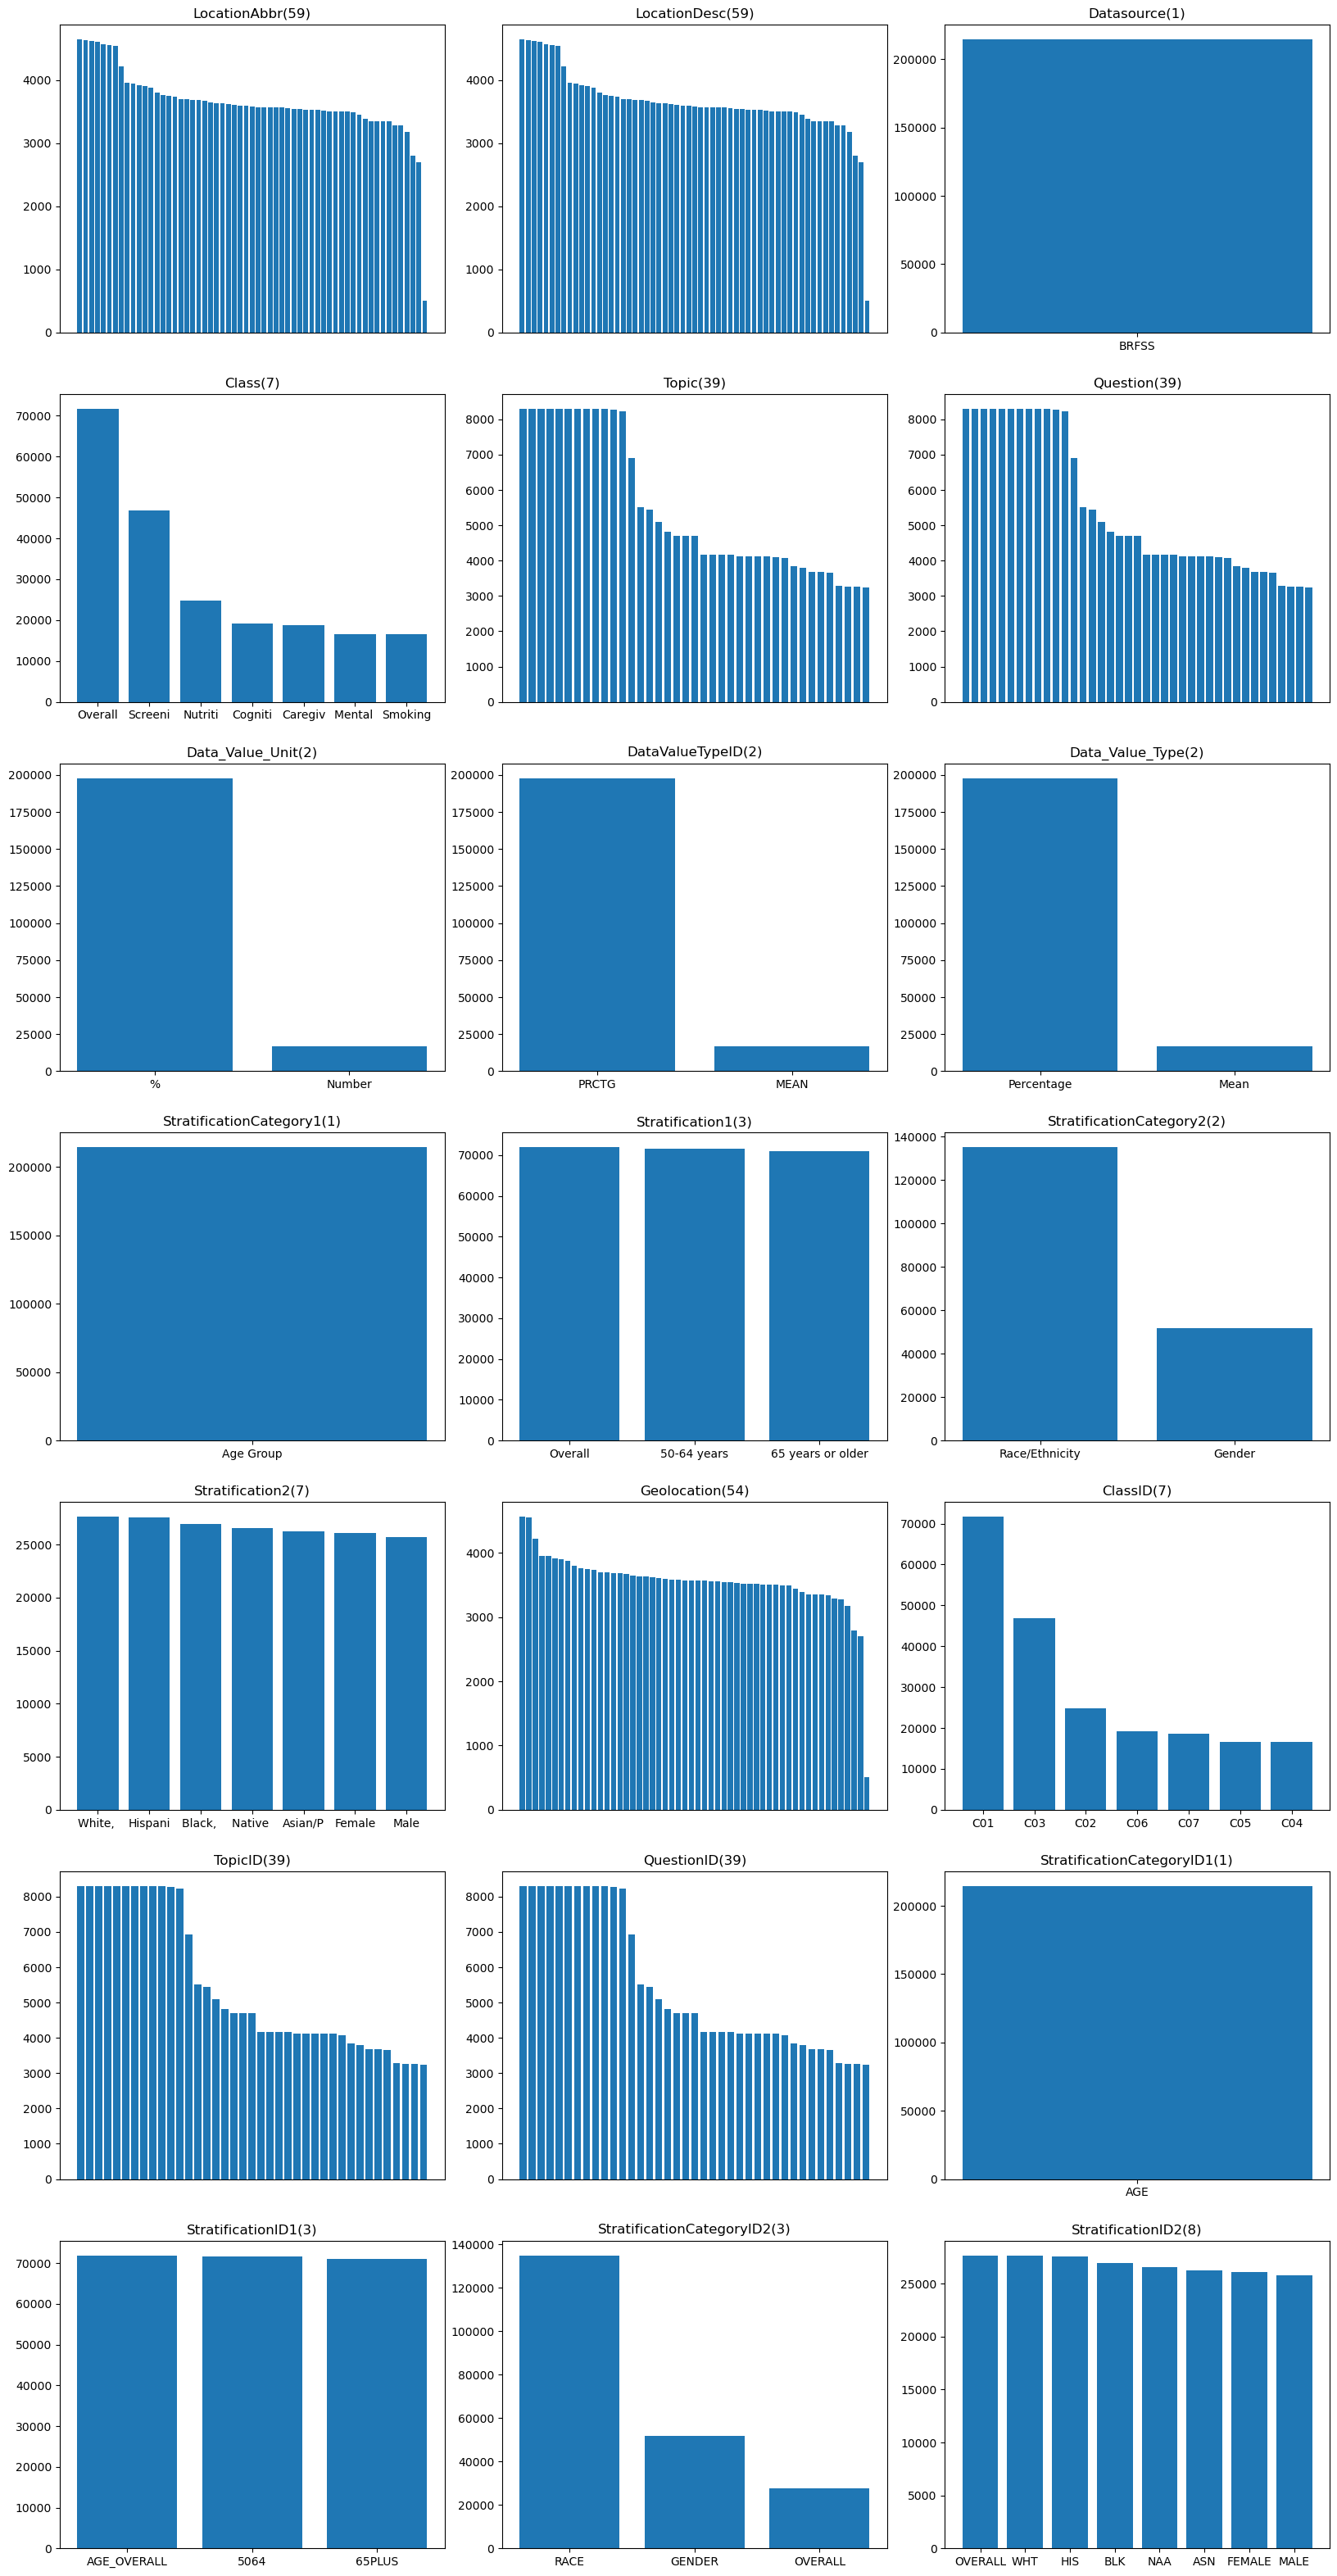

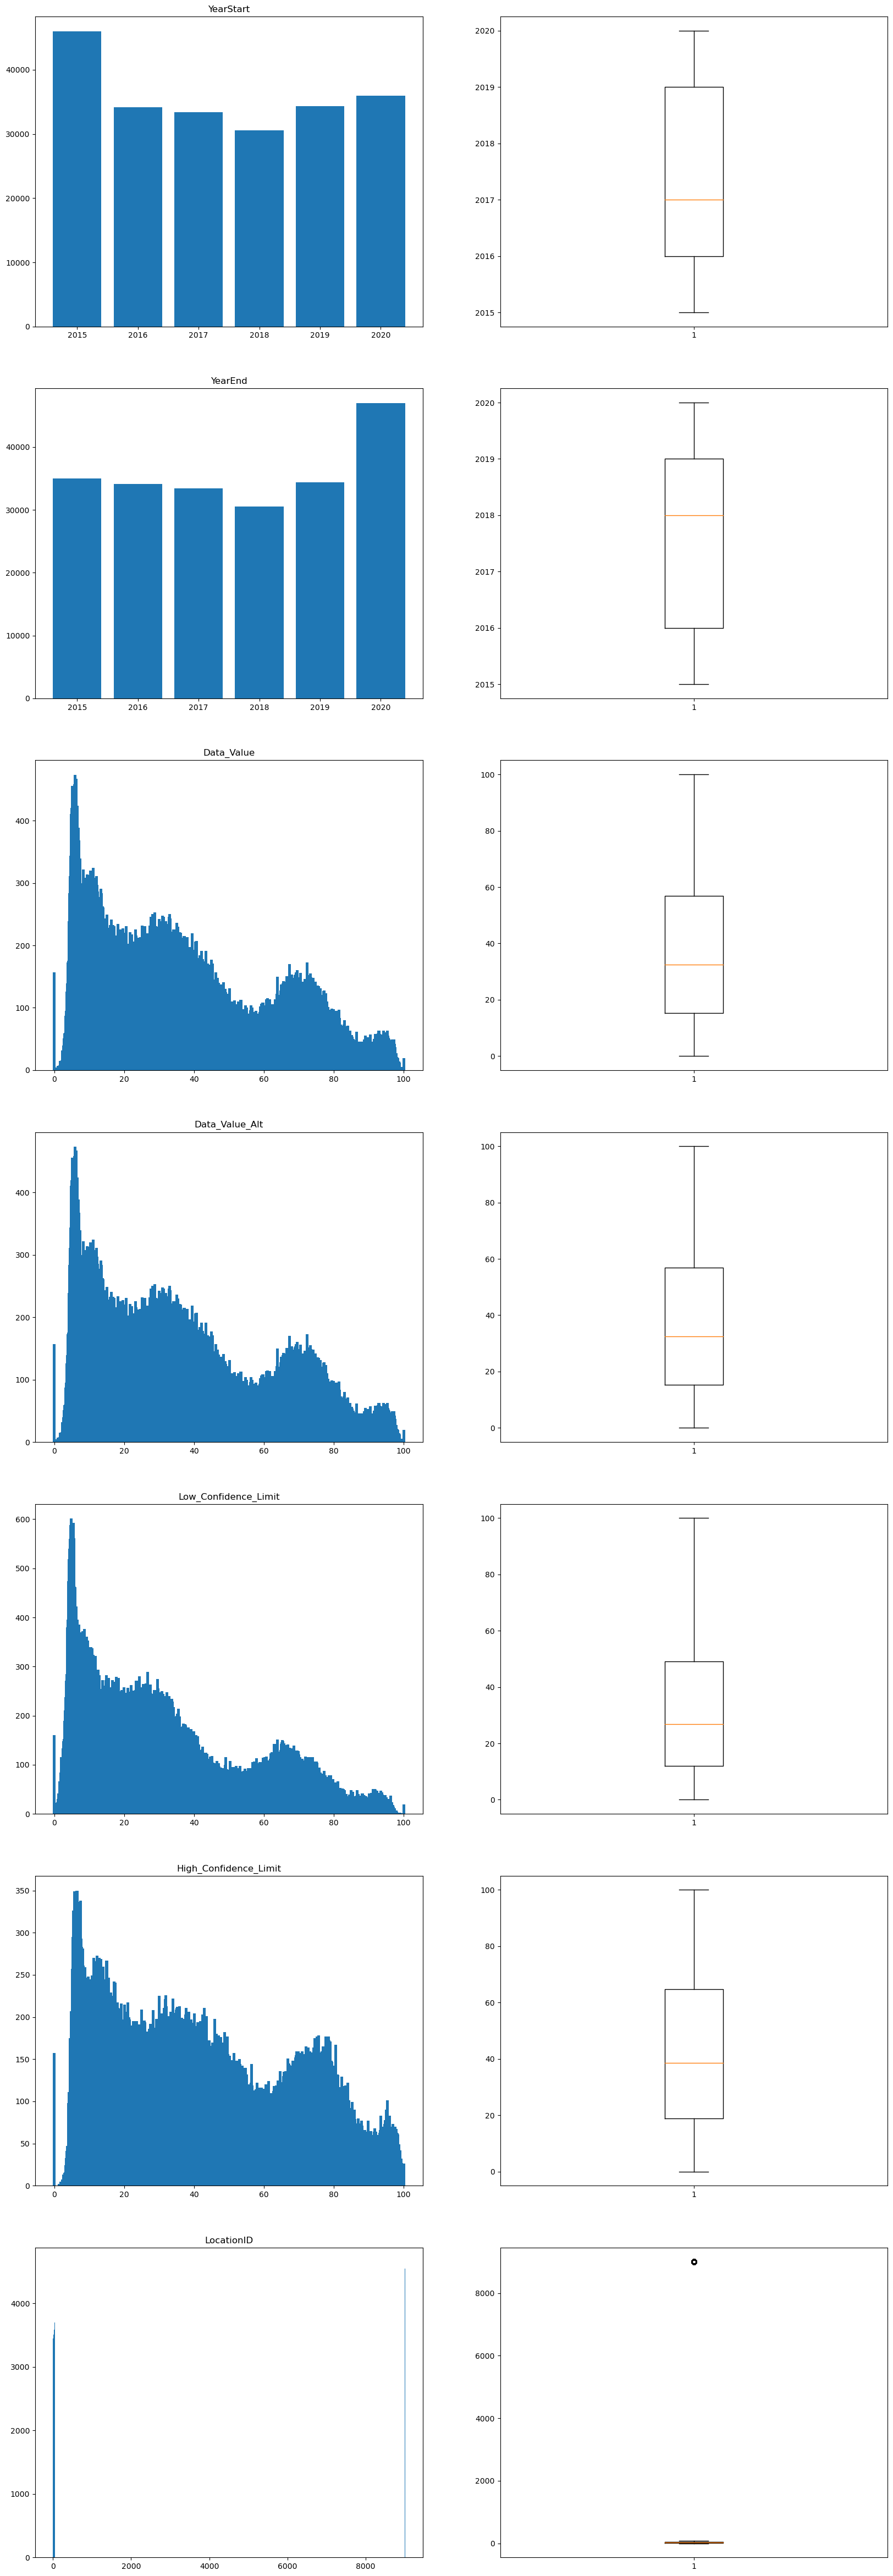

In [222]:
data["Low_Confidence_Limit"][np.isnan(data["Low_Confidence_Limit"])] = data["Data_Value"][np.isnan(data["Low_Confidence_Limit"])]
data["High_Confidence_Limit"][np.isnan(data["High_Confidence_Limit"])] = data["Data_Value"][np.isnan(data["High_Confidence_Limit"])]
plt.figure(figsize=(20, 40))
for i, col in enumerate(nominal_col):
    plt.subplot(7, 3, i+1)
    x = data[col].value_counts()._stat_axis.values.tolist()
    y = data[col].value_counts()[x]
    if col == 'Class' or col == 'Stratification2':
        x = [j[:7] for j in x]
    if len(x)>=10:
        plt.xticks([])
    plt.title(col+"("+str(len(x))+")")
    plt.bar(x, y)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()
plt.figure(figsize=(20, 60))
for i, col in enumerate(value_col):
    plt.subplot(7, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.bar(x, y)
    plt.subplot(7, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果通过属性的相关关系来填补缺失值，经过观察修改过后各属性的直方图和盒图，可以看到此操作可以在数据分布变化不大的同时丰富数据集，但是由于该数据集有效数值属性极少，并且缺失值往往伴随着该条实例同时缺失其它的属性值，因此该方法对于该数据集在准确性上做的不好。

In [227]:
# 通过数据对象之间的相似性来填补缺失值
data = pd.read_csv(r'D:\学习资料\数据挖掘\Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)
data["Low_Confidence_Limit"] = data["Low_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')
data["High_Confidence_Limit"] = data["High_Confidence_Limit"].apply(pd.to_numeric, errors='coerce')

In [237]:
import tqdm
for j in tqdm.tqdm(range(214462)):
    if np.isnan(data["Data_Value"][j]):
        topic = data["Topic"][j]
        for k in range(0, 200000):
            if data["Topic"][k] == topic and ~np.isnan(data["Data_Value"][k]) and ~np.isnan(data["Low_Confidence_Limit"][k]):
                data["Data_Value"][j] = data["Data_Value"][k]
                data["Data_Value_Alt"][j] = data["Data_Value_Alt"][k]
                data["Low_Confidence_Limit"][j] = data["Low_Confidence_Limit"][k]
                data["High_Confidence_Limit"][j] = data["High_Confidence_Limit"][k]
                break
    elif np.isnan(data["Low_Confidence_Limit"][j]):
        topic = data["Topic"][j]
        for k in range(0, 200000):
            if data["Topic"][k] == topic and ~np.isnan(data["Low_Confidence_Limit"][k]):
                data["Low_Confidence_Limit"][j] = data["Low_Confidence_Limit"][k]
                data["High_Confidence_Limit"][j] = data["High_Confidence_Limit"][k]
                break
                

100%|████████████████████████████████████████████████████████████████████████| 214462/214462 [01:46<00:00, 2020.78it/s]


In [239]:
# 验证缺失值已全部填充完毕
data["Low_Confidence_Limit"].isna().sum()

0

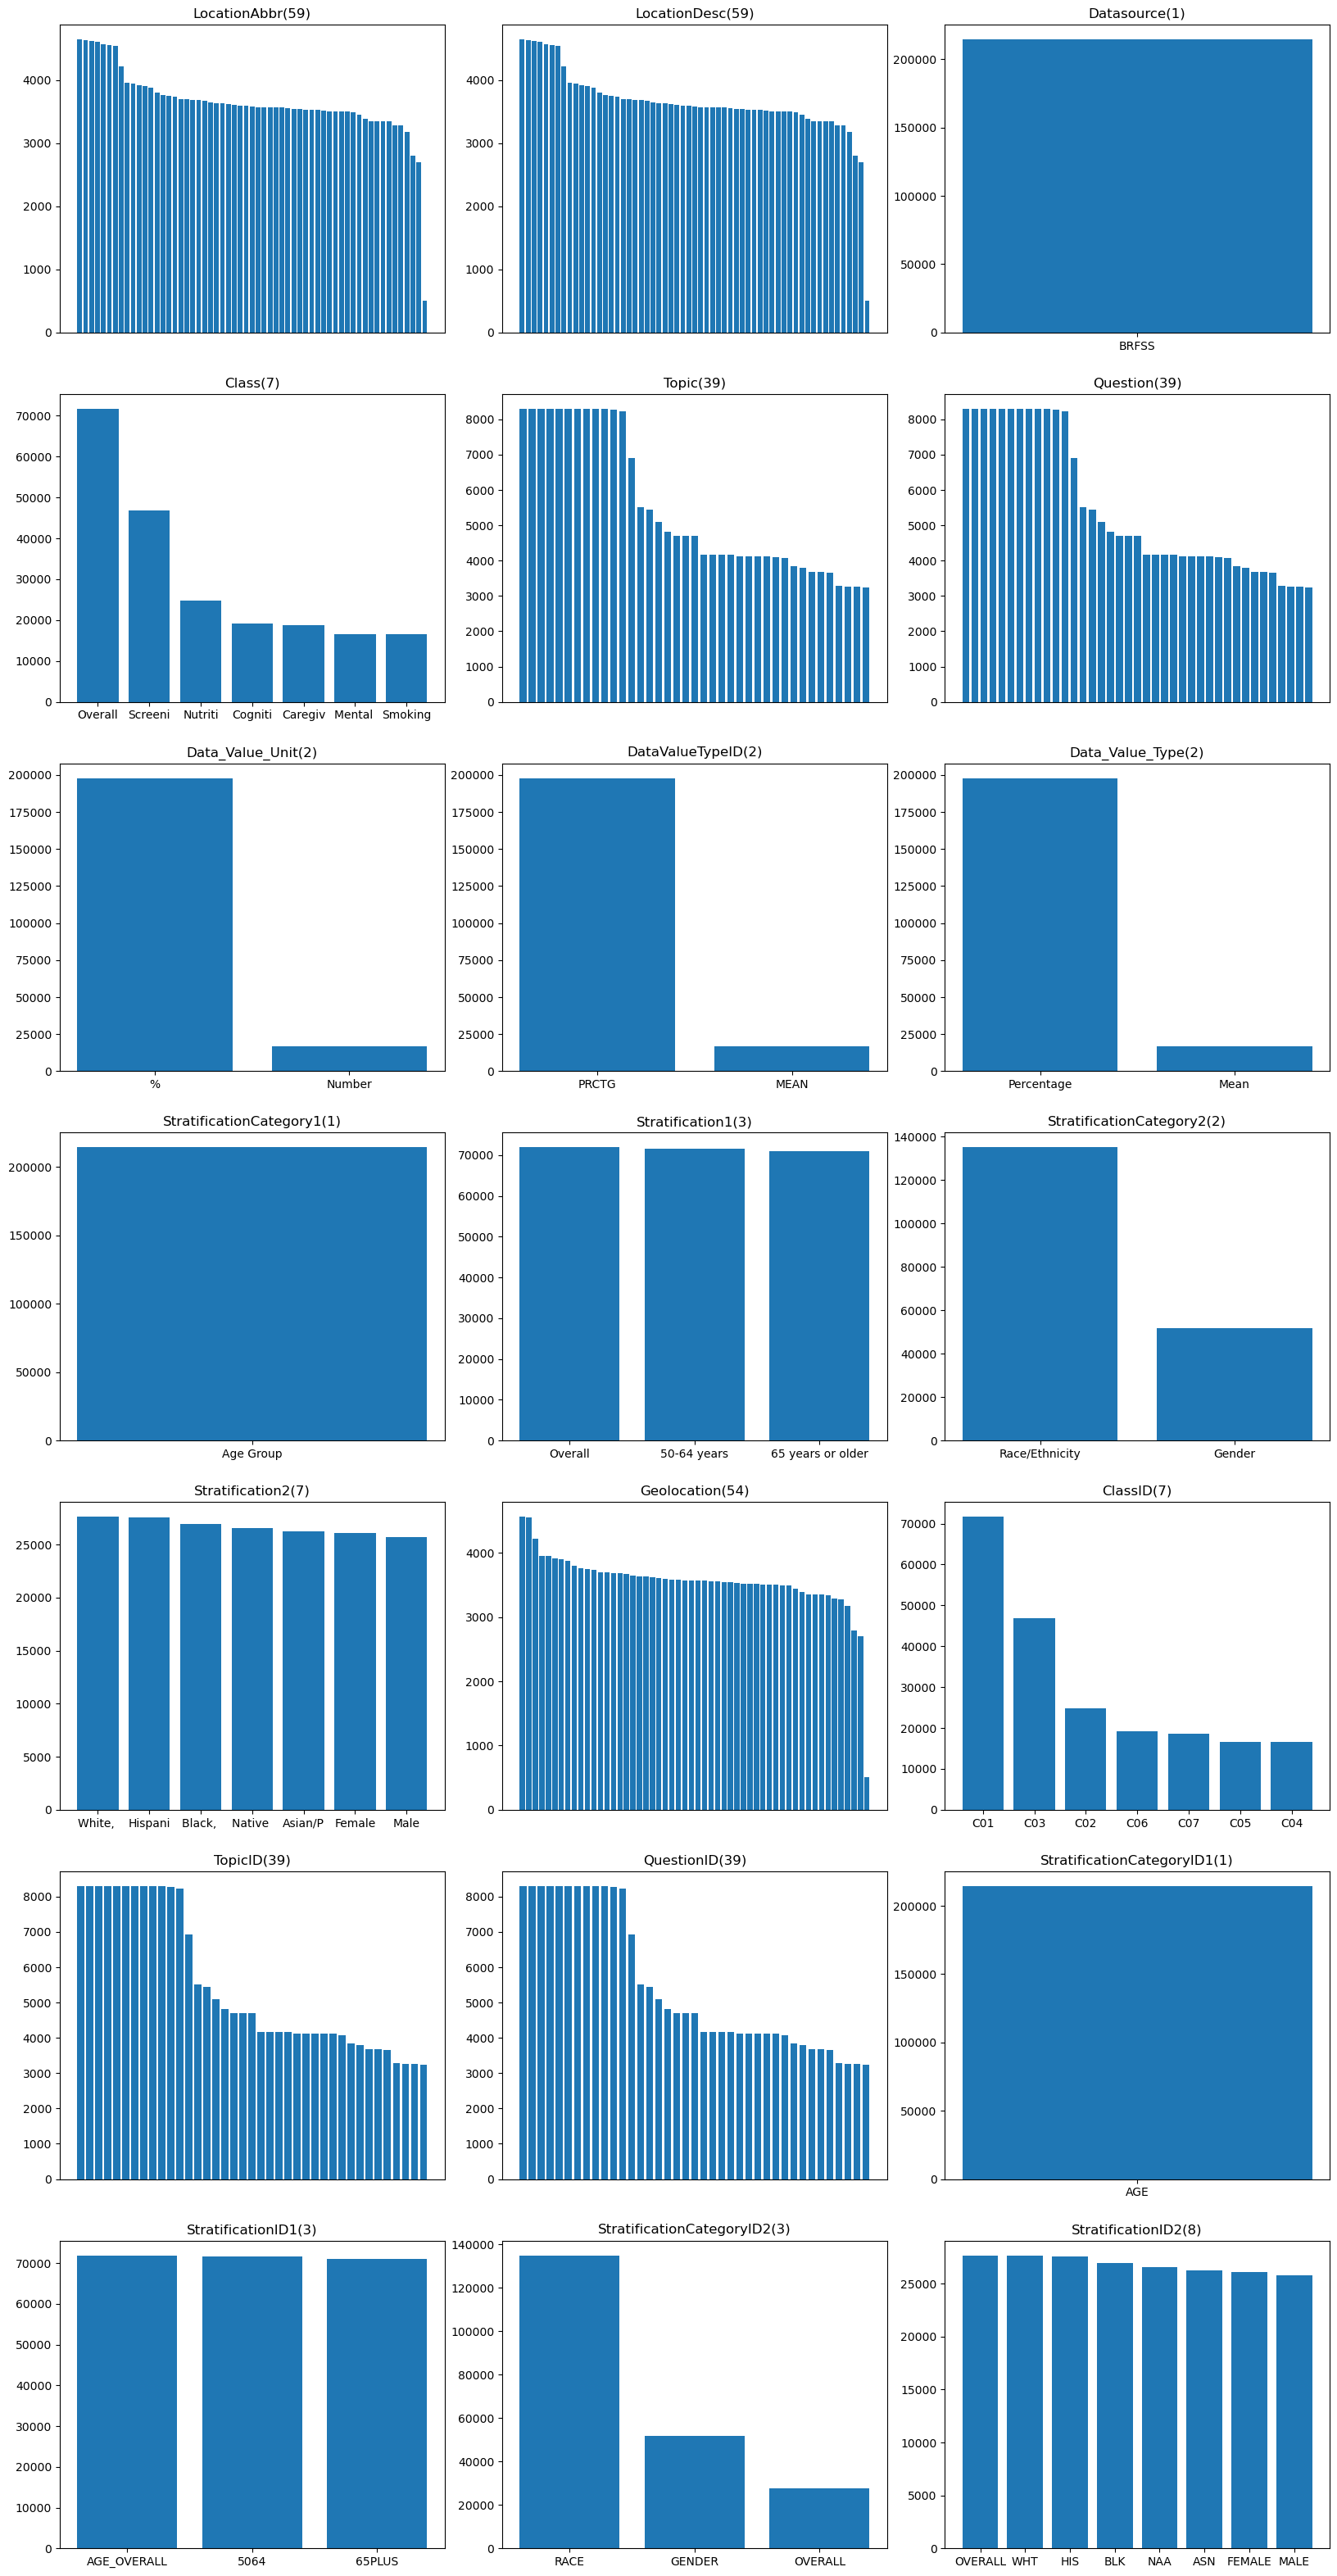

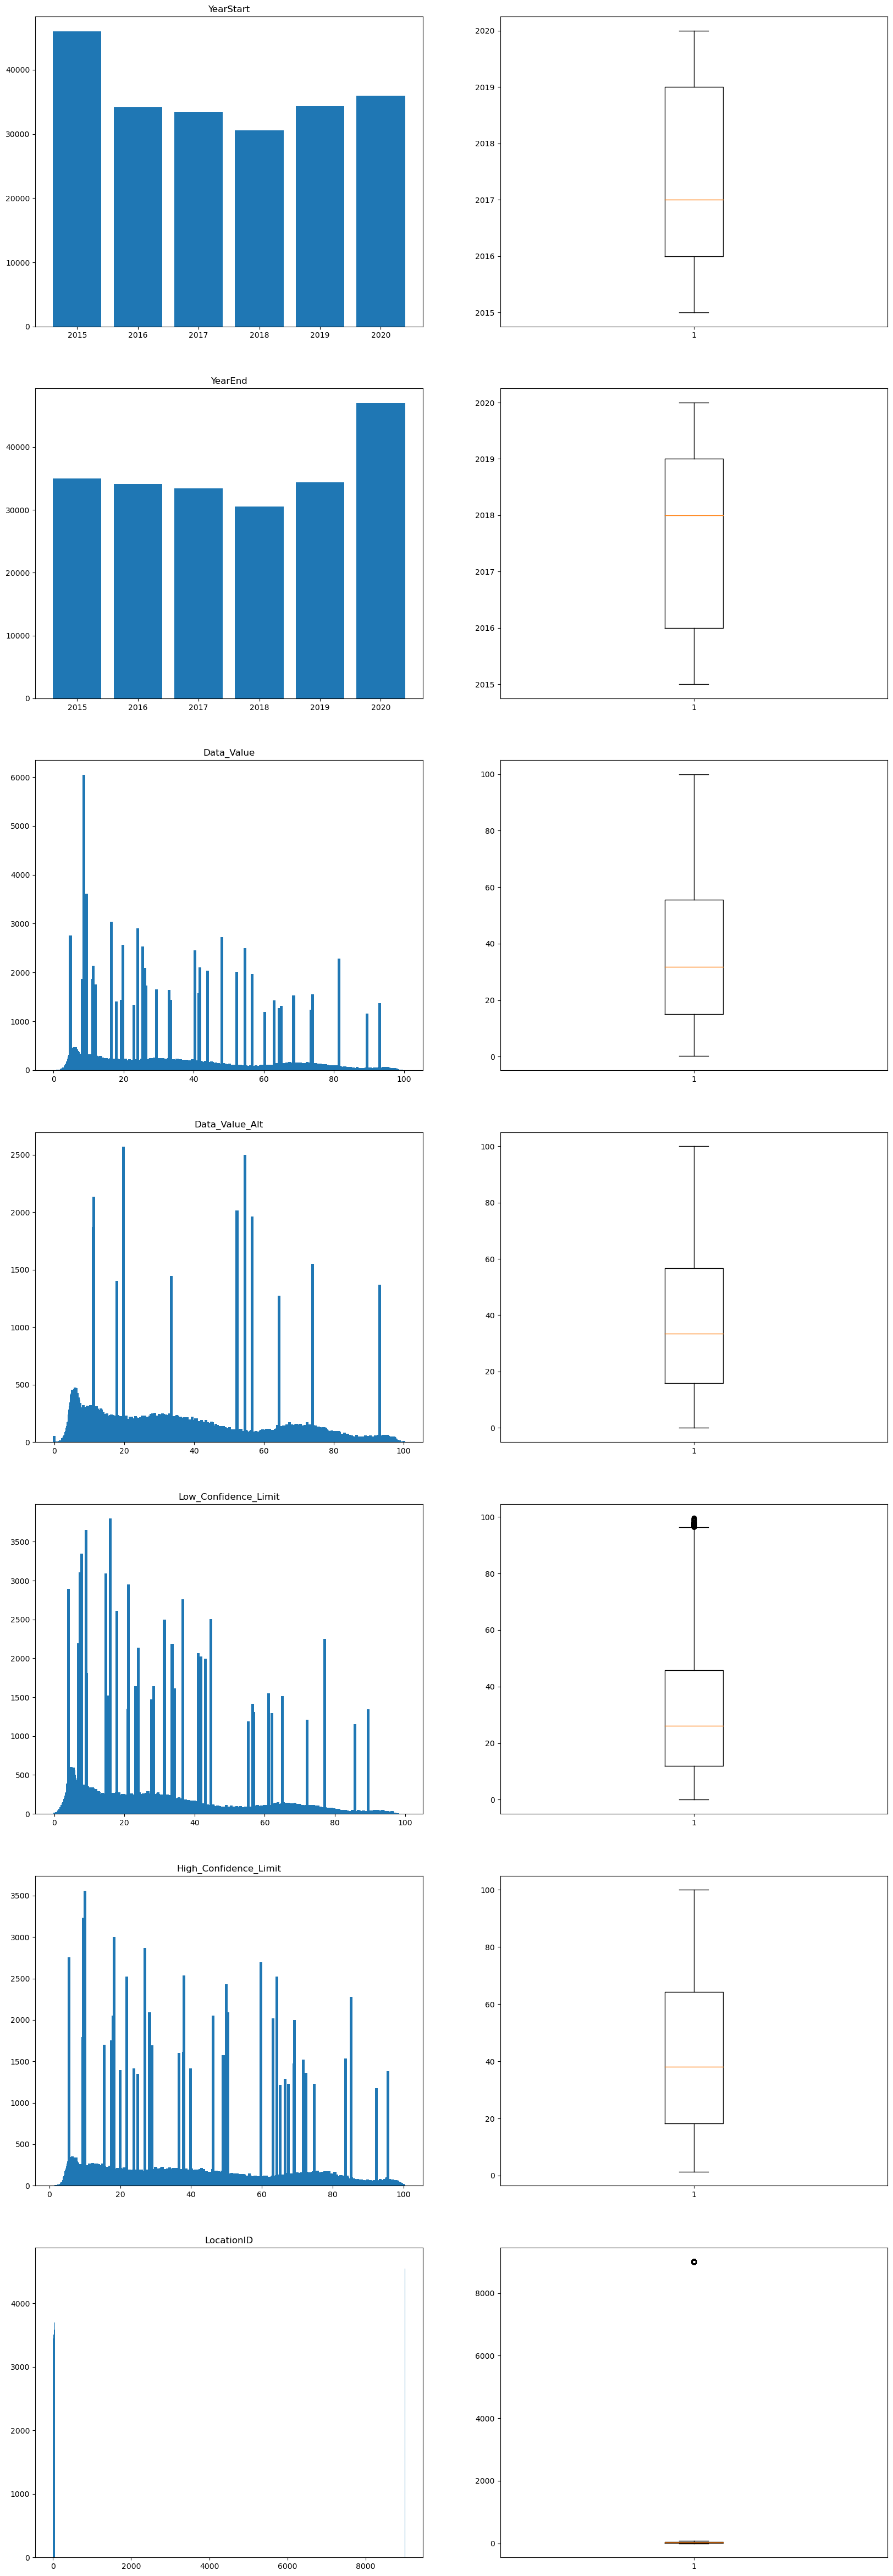

In [240]:
plt.figure(figsize=(20, 40))
for i, col in enumerate(nominal_col):
    plt.subplot(7, 3, i+1)
    x = data[col].value_counts()._stat_axis.values.tolist()
    y = data[col].value_counts()[x]
    if col == 'Class' or col == 'Stratification2':
        x = [j[:7] for j in x]
    if len(x)>=10:
        plt.xticks([])
    plt.title(col+"("+str(len(x))+")")
    plt.bar(x, y)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()
plt.figure(figsize=(20, 60))
for i, col in enumerate(value_col):
    plt.subplot(7, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.bar(x, y)
    plt.subplot(7, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果通过数据对象之间的相似性来填补缺失值，经过观察修改后各属性的直方图和盒图，可以看到此操作能够和通过属性的相关系填补缺失值一样很好地丰富数据，并保证基本维持原数据集的分布不变，然而由于缺失值直接参考了相似数据对象的对应属性值，因此这往往意味着重复数据的产生，不能很好地体现数据本身的特异性。

# Movies Dataset from Pirated Sites
第二个分析的数据集使用的是来自盗版网站的电影数据集

In [283]:
# 数据读取
import pandas as pd
data = pd.read_csv(r'D:\学习资料\数据挖掘\movies_dataset.csv', low_memory=False)

In [284]:
### 数据摘要
# 分析属性数据类型
print(data.dtypes)
pd.set_option('display.max_columns', None)
data.head(5)

Unnamed: 0           int64
IMDb-rating        float64
appropriate_for     object
director            object
downloads           object
id                   int64
industry            object
language            object
posted_date         object
release_date        object
run_time            object
storyline           object
title               object
views               object
writer              object
dtype: object


,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman


In [285]:
# 提取标称属性
# 注：由于在后续的分析中，发现downloads、id、views三个属性应当是数值属性，因此这里人为将这三个属性的数据类型（object）转为数值类型
data["downloads"] = data["downloads"].apply(pd.to_numeric, errors='coerce')
data["id"] = data["id"].apply(pd.to_numeric, errors='coerce')
data["views"] = data["views"].apply(pd.to_numeric, errors='coerce')
nominal_col = [i for i in data.dtypes._stat_axis.values.tolist() if data.dtypes[i]=='object']
print(nominal_col)
# 提取数值属性
value_col = [i for i in data.dtypes._stat_axis.values.tolist() if i not in nominal_col]
print(value_col)

['appropriate_for', 'director', 'industry', 'language', 'posted_date', 'release_date', 'run_time', 'storyline', 'title', 'writer']
['Unnamed: 0', 'IMDb-rating', 'downloads', 'id', 'views']


In [286]:
# 标称属性取值频数，由于该数据集标称属性取值过多，不适于用直方图显示，因此此处只显示了部分取值个数
for i, col in enumerate(nominal_col):
    print("--------------------------"+col+"--------------------------")
    y = data[col].value_counts()
    print(y)

--------------------------appropriate_for--------------------------
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
--------------------------director--------------------------
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dy

In [287]:
# 数值属性五数概述、缺失值个数
for i in value_col:
    print("-------------"+i+"-------------")
    print("Min(最小值):"+str(min(data[i])))
    print("Q1(第一四分位数):"+str(data[i].quantile(q=0.25,interpolation='linear')))
    print("Q2(中位数):"+str(data[i].quantile(q=0.5,interpolation='linear')))
    print("Q3(第三四分位数):"+str(data[i].quantile(q=0.75,interpolation='linear')))
    print("Max(最大值):"+str(max(data[i])))
    print("缺失值个数:"+str(data[i].isna().sum()))

-------------Unnamed: 0-------------
Min(最小值):0
Q1(第一四分位数):5136.75
Q2(中位数):10273.5
Q3(第三四分位数):15410.25
Max(最大值):20547
缺失值个数:0
-------------IMDb-rating-------------
Min(最小值):1.1
Q1(第一四分位数):4.8
Q2(中位数):5.7
Q3(第三四分位数):6.6
Max(最大值):9.9
缺失值个数:841
-------------downloads-------------
Min(最小值):0.0
Q1(第一四分位数):284.0
Q2(中位数):466.0
Q3(第三四分位数):683.0
Max(最大值):999.0
缺失值个数:15003
-------------id-------------
Min(最小值):1
Q1(第一四分位数):96122.25
Q2(中位数):264457.5
Q3(第三四分位数):354561.25
Max(最大值):372092
缺失值个数:0
-------------views-------------
Min(最小值):nan
Q1(第一四分位数):857.25
Q2(中位数):897.0
Q3(第三四分位数):939.75
Max(最大值):nan
缺失值个数:20538


### 分析
Unnamed：0应当为显示bug，它表示的是数据的id，一条数据对应一个特异的id，可见该数据集包含20547条数据；

IMDb-rating表示该电影的评分，取值应当为1-10，根据直方图和盒图可知，大部分电影评分在5-9之间；

appropriate_for表示电影的评级，即谁可以看此类电影，取值有R、PG、G等，大多数电影都是R级电影；

director表示电影导演，可以看到数据一共包含9672位导演的电影，其中Venky Atluri和Simone Stock的电影最多，一共占了八百多，远超其它导演；

downloads表示电影下载量，大部分电影下载量在500左右；

id表示电影的id，这表示多条数据可能来自同一个电影；

industry表示电影制造商，一共出现10种制造商，其中好莱坞包含14649个数据，远超其它电影制造商；

language表示电影的语言，只要是电影种出现了就包含，因此该属性是各个语言组合，一共出现了1168种语言组合，纯英文电影共12657个数据，远超其它语言；

posted_date表示电影上传到盗版网站的日期，可以看到包含2009-2023年的数据， 2023年2月份包含了相当一部分数据；

release_date表示电影自身发布的日期，可以看到包含1958-2023年的数据，其中1970年1月1号竟然有962条数据，大幅高于其他日期；

run_time表示电影时长，大部分电影时长在1h30min-2h30min之间；

storyline表示故事线，具有电影特异性，相同的电影具有相同的取值；

title表示电影名，具有电影特异性，相同的电影具有相同的取值；

views表示点击量，大部分电影点击量在900左右；

writer表示电影的编剧作者，这个属性也是个组合属性，共有13603种编剧组合，其中Nicholas Schutt、Venky Atluri、Haley Harris三位编剧的电影都为400多条数据，远超其它编剧作者。 

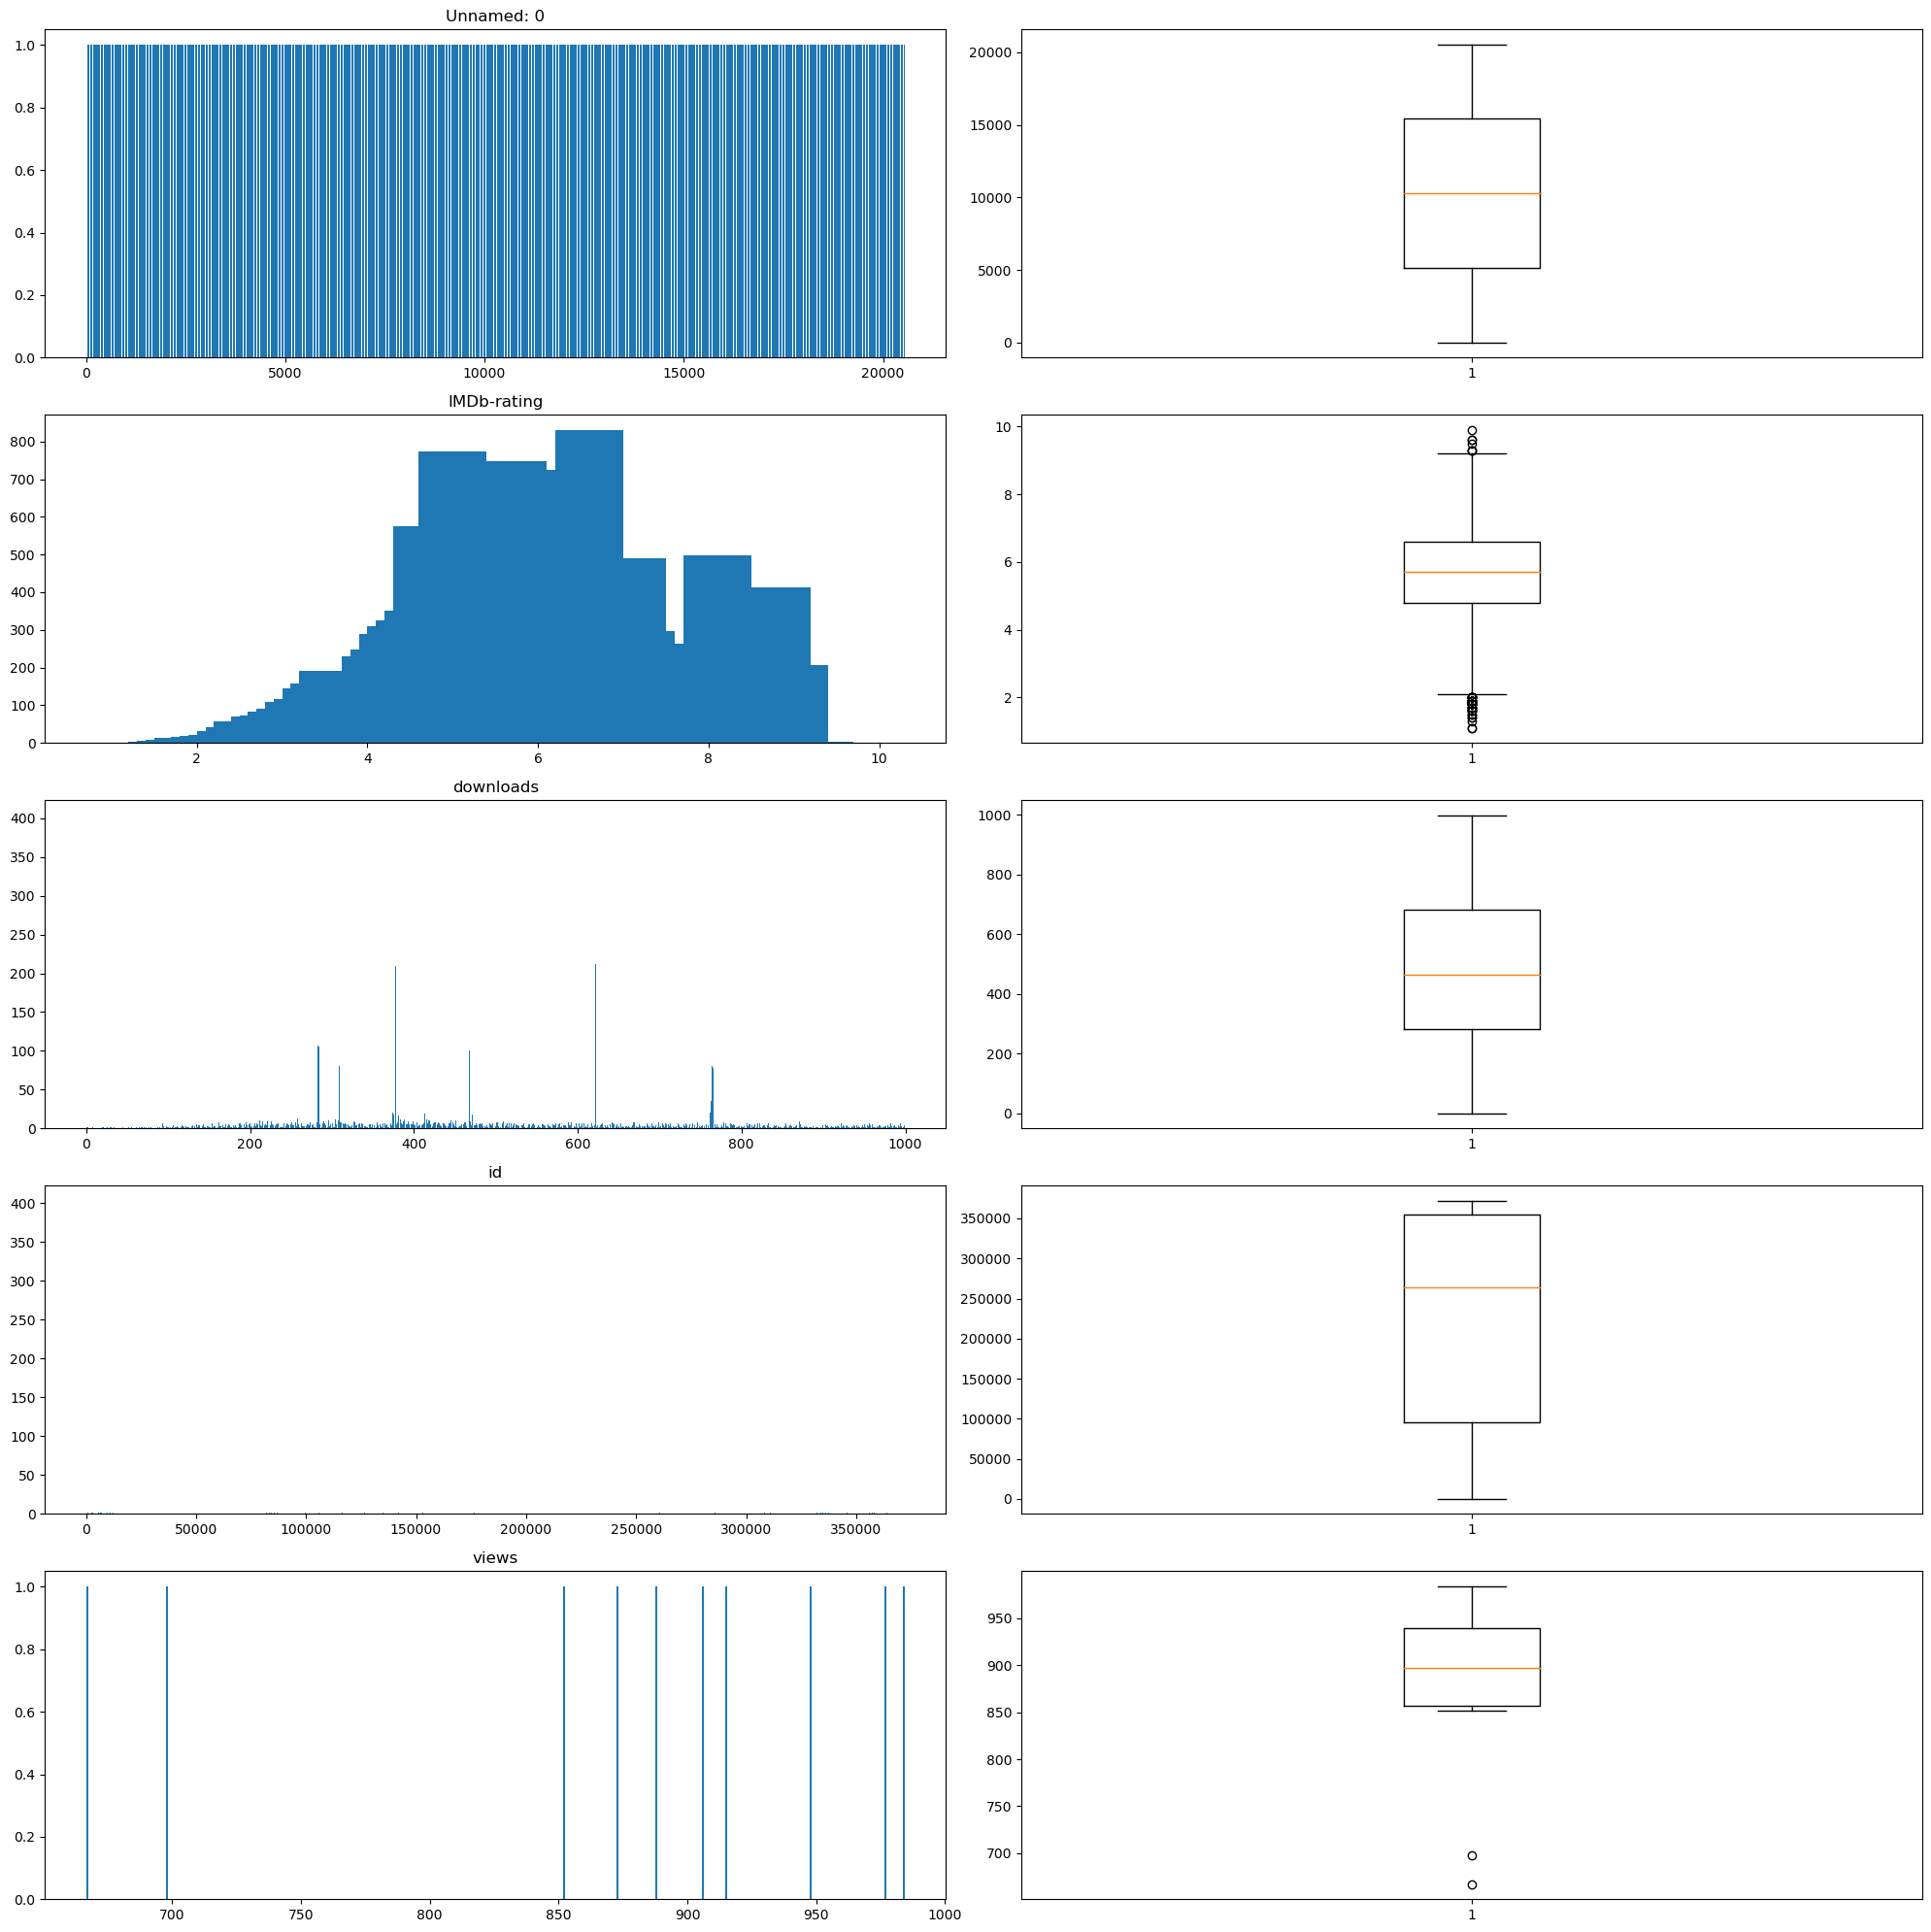

In [288]:
### 数据可视化
# 直方图统计&盒图

plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

In [275]:
data.shape[0]
data["id"].value_counts().sort_index(axis=0)

1           1
2           1
3           1
4           1
5           1
         ... 
372088      1
372089      1
372090    402
372091      1
372092    202
Name: id, Length: 17086, dtype: int64

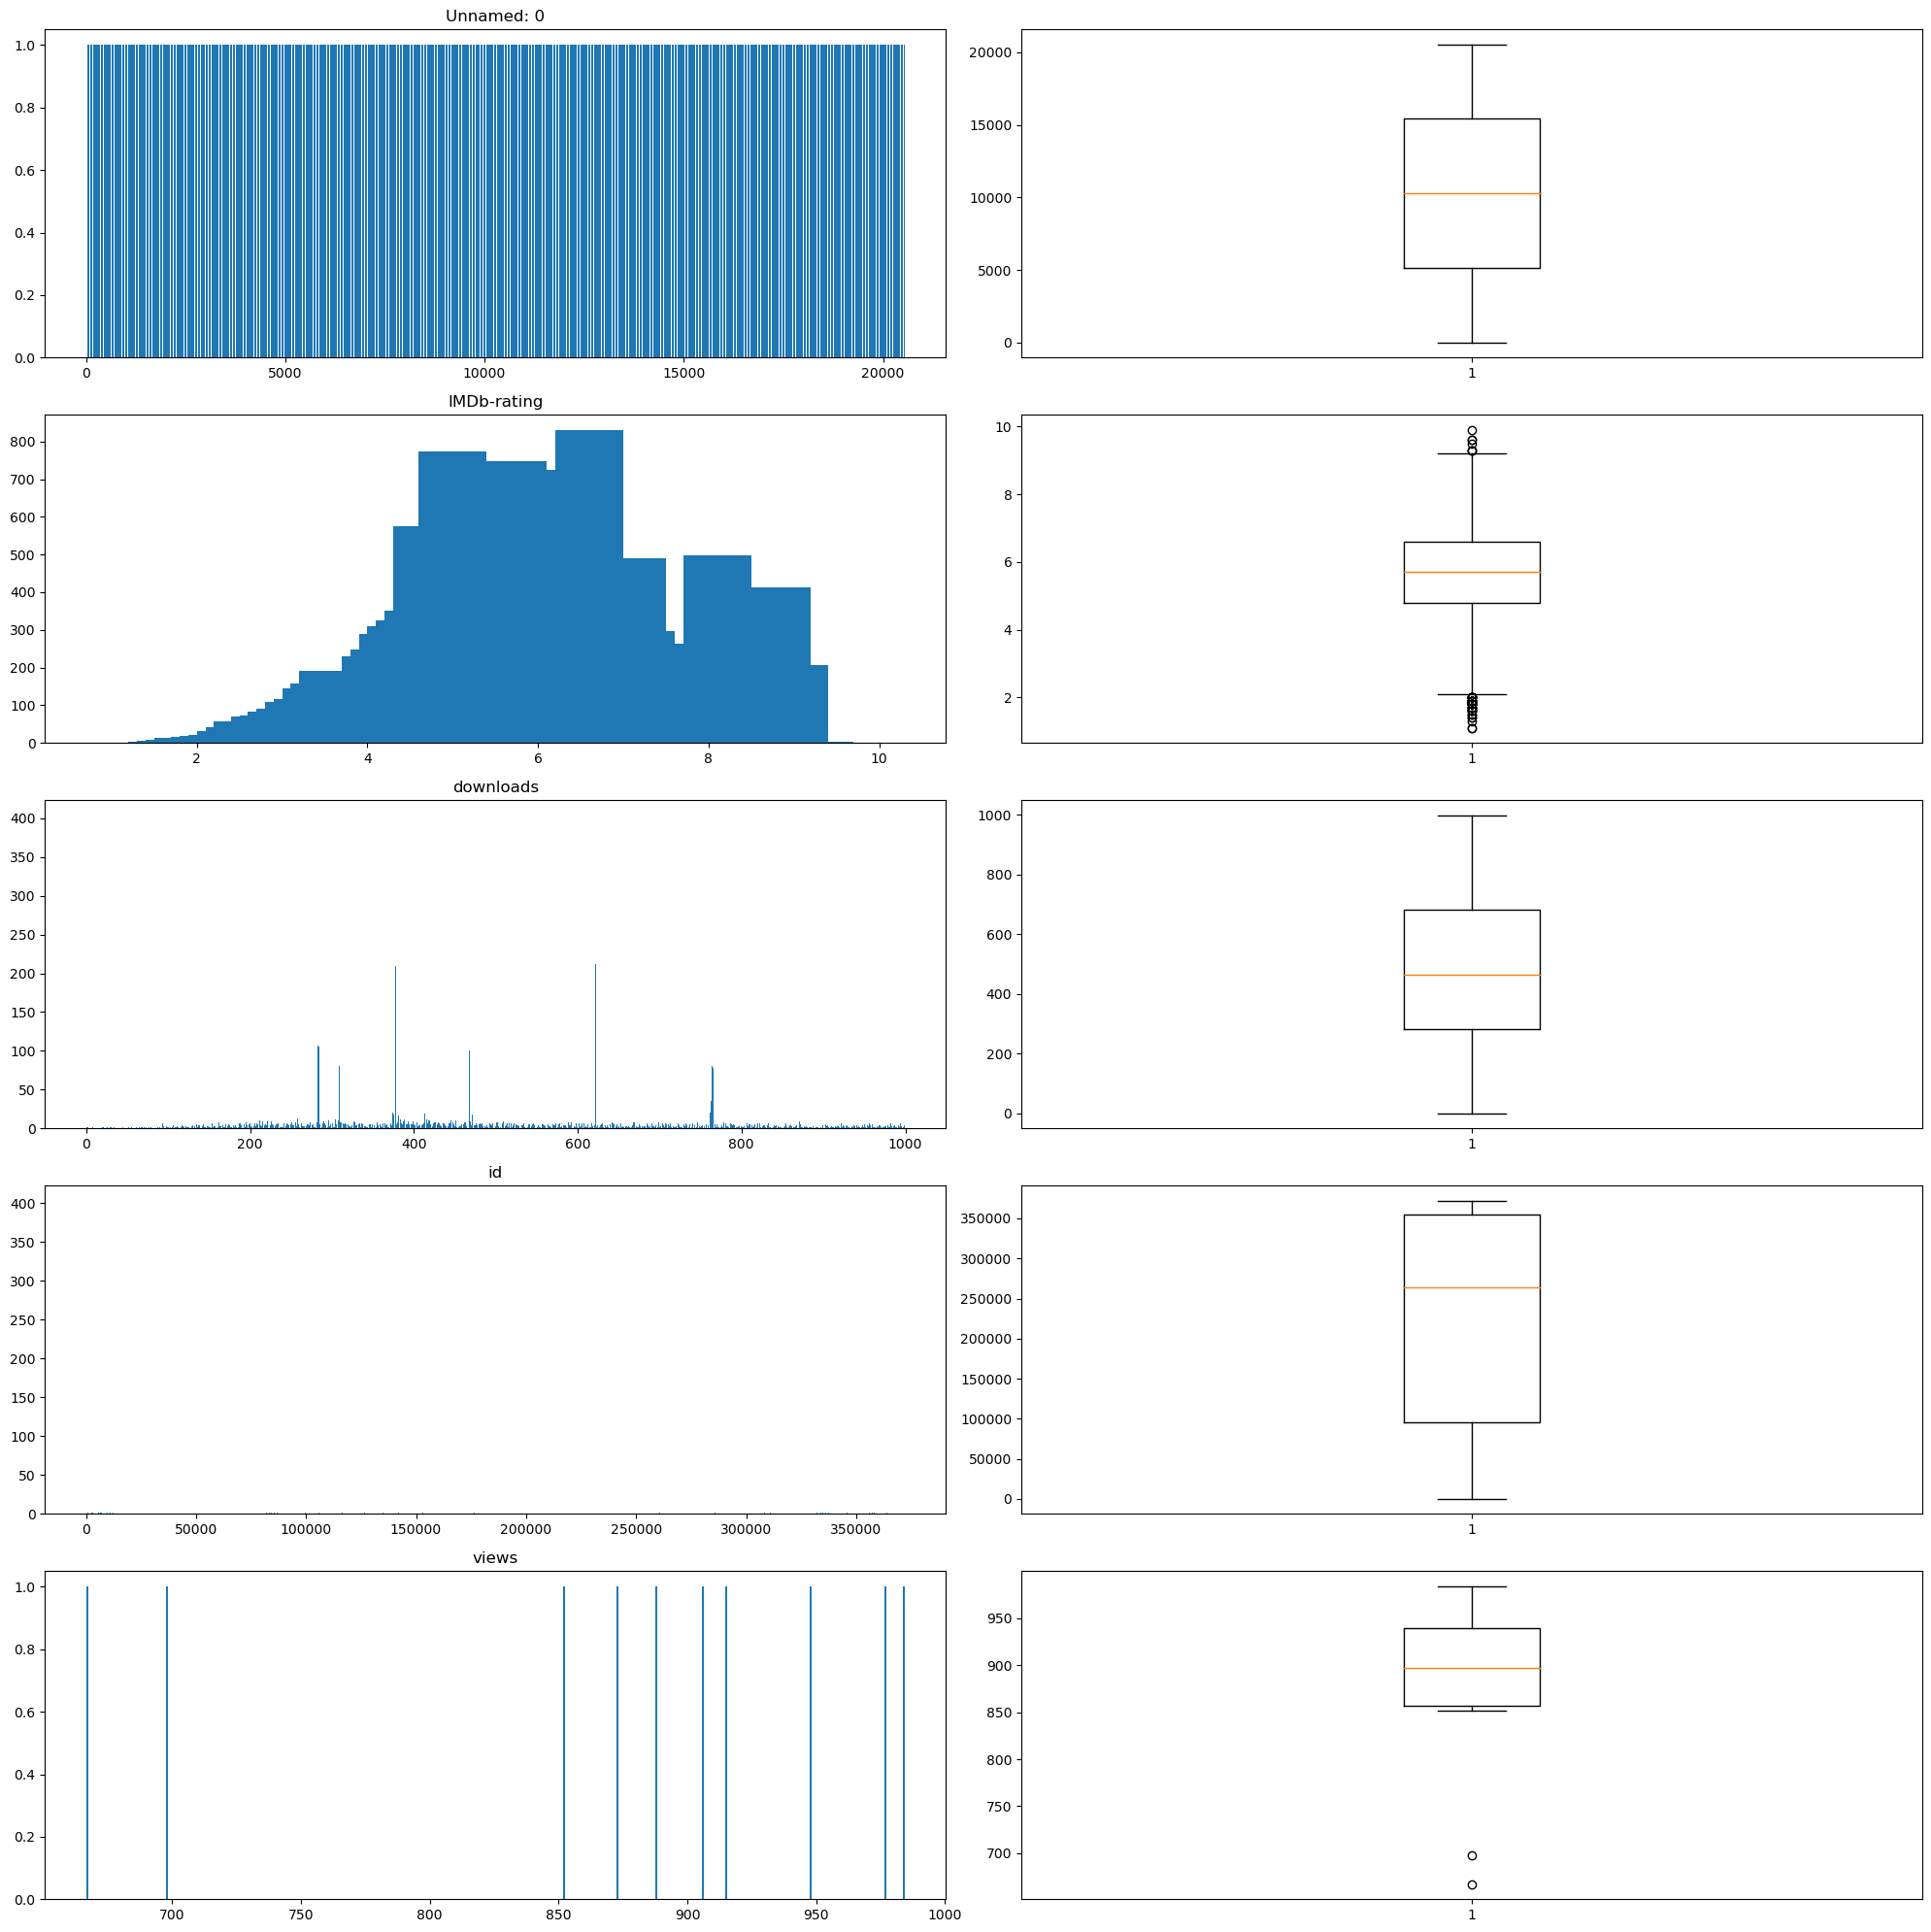

In [280]:
### 缺失值处理，针对缺失数据的数值属性：IMDb-rating、downloads、views进行缺失值处理
process_col = ["IMDb-rating", "downloads", "views"]
# 将缺失部分剔除
data.dropna(axis=0,subset = process_col)
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果将缺失部分剔除，经过观察修改过后各属性的直方图和盒图，可以看到对数据集属性各分布几乎没有影响，这可能是由于缺失值对应其它属性的取值分布比较均匀导致的。

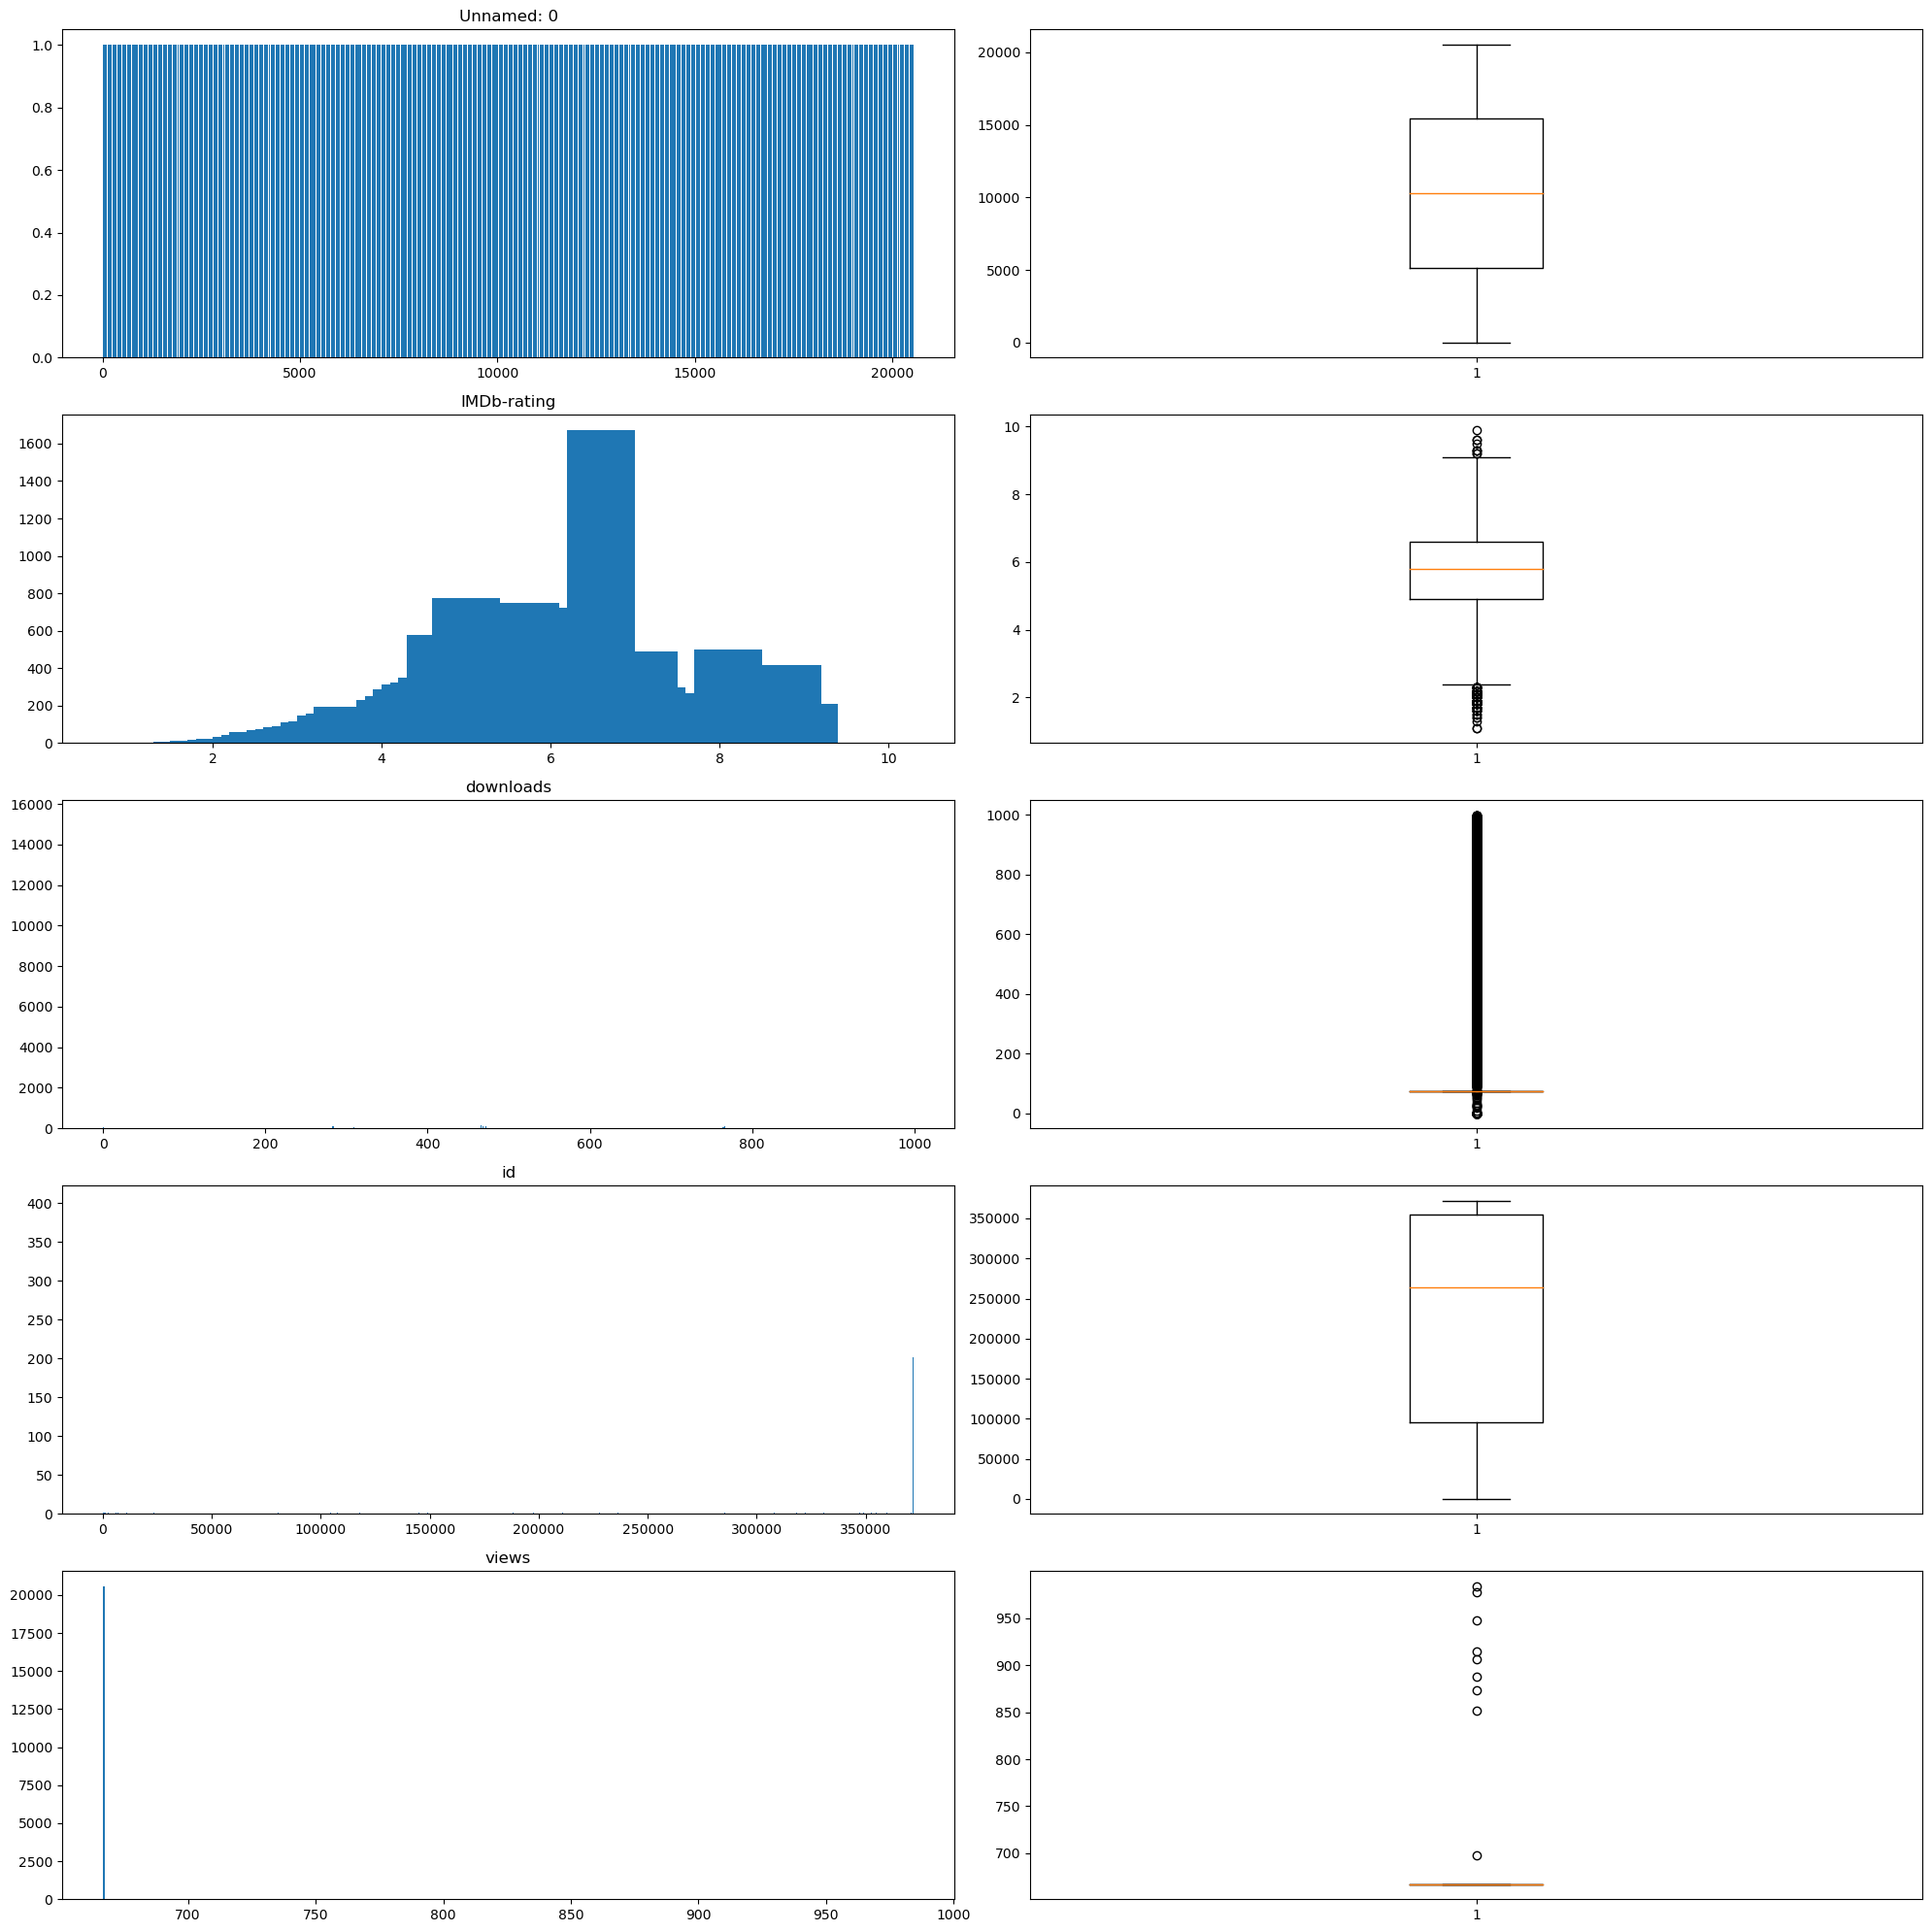

In [281]:
# # 用最高频率值来填补缺失值
data = pd.read_csv(r'D:\学习资料\数据挖掘\movies_dataset.csv', low_memory=False)
data["downloads"] = data["downloads"].apply(pd.to_numeric, errors='coerce')
data["id"] = data["id"].apply(pd.to_numeric, errors='coerce')
data["views"] = data["views"].apply(pd.to_numeric, errors='coerce')
for i in process_col:
    data[i][np.isnan(data[i])] = data[i].mode()[0]
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果用最高频率值来填补缺失值，经过观察修改过后各属性的直方图和盒图，可以看到这一操作极大影响了数据集的分布，这可能与缺失值占比过大导致的，另一方面，仅使用众数也不能很好地描述数据集的分布，新数据集在缺失值属性上众数取值数量与其他取值数量极其悬殊，这一操作严重改变了原数据集的数据分布，个人认为该方法对于该数据集来说不是很好的缺失值处理方法。

In [289]:
# 通过属性的相关关系来填补缺失值
data = pd.read_csv(r'D:\学习资料\数据挖掘\movies_dataset.csv', low_memory=False)
data["downloads"] = data["downloads"].apply(pd.to_numeric, errors='coerce')
data["id"] = data["id"].apply(pd.to_numeric, errors='coerce')
data["views"] = data["views"].apply(pd.to_numeric, errors='coerce')
corr = data.corr()
corr

,Unnamed: 0,IMDb-rating,downloads,id,views
Unnamed: 0,1.000000,0.028844,0.053943,-0.829417,-0.470734
IMDb-rating,0.028844,1.000000,-0.300821,0.048087,NaN
downloads,0.053943,-0.300821,1.000000,-0.278059,0.759614
id,-0.829417,0.048087,-0.278059,1.000000,0.478610
views,-0.470734,NaN,0.759614,0.478610,1.000000


In [290]:
data["downloads"][np.isnan(data["downloads"])] = data["views"][np.isnan(data["downloads"])]
data["views"][np.isnan(data["views"])] = data["downloads"][np.isnan(data["views"])]

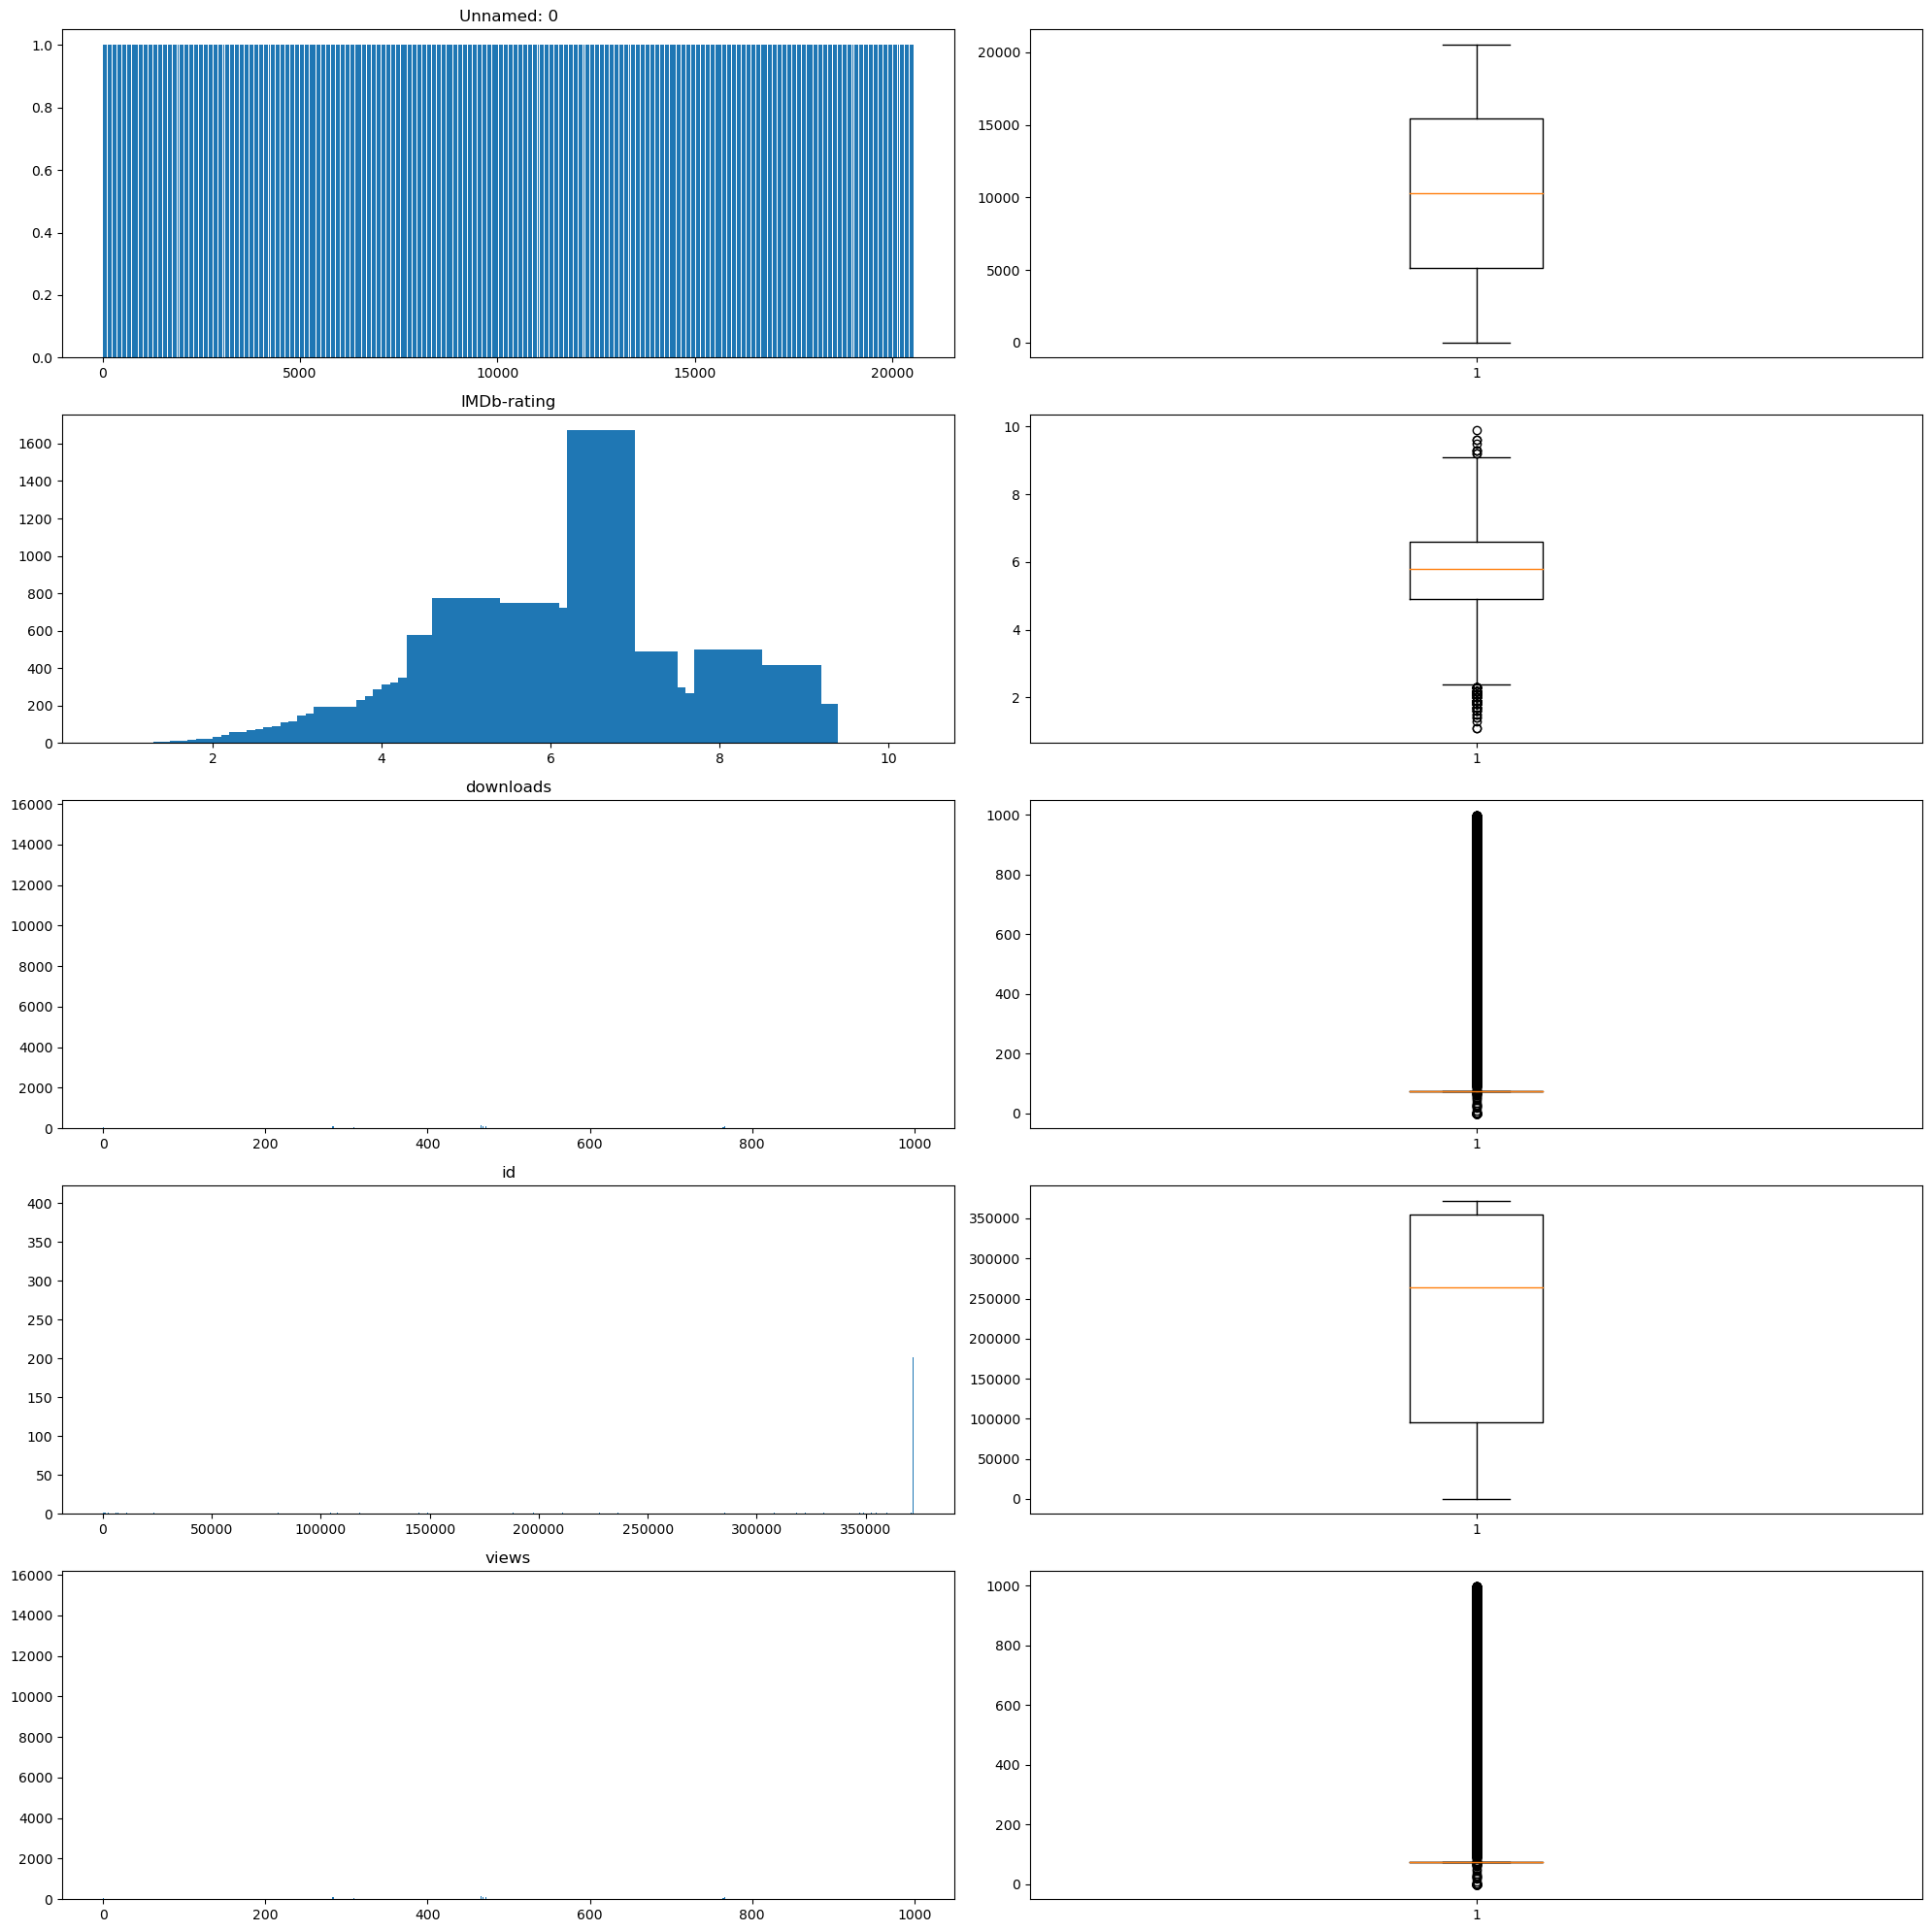

In [291]:
for i in process_col:
    data[i][np.isnan(data[i])] = data[i].mode()[0]
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果通过属性的相关关系来填补缺失值，经过观察修改过后各属性的直方图和盒图，可以看到此操作改变了原来数据集的分析，思考其原因，可能是由于属性间的相关关系不大造成的，另外由于该数据集有效数值属性极少，并且缺失值往往伴随着该条实例同时缺失其它的属性值，因此该方法对于该数据集在准确性上做的不好。

100%|████████████████████████████████████████████████████████████████████████████| 20547/20547 [18:10<00:00, 18.85it/s]


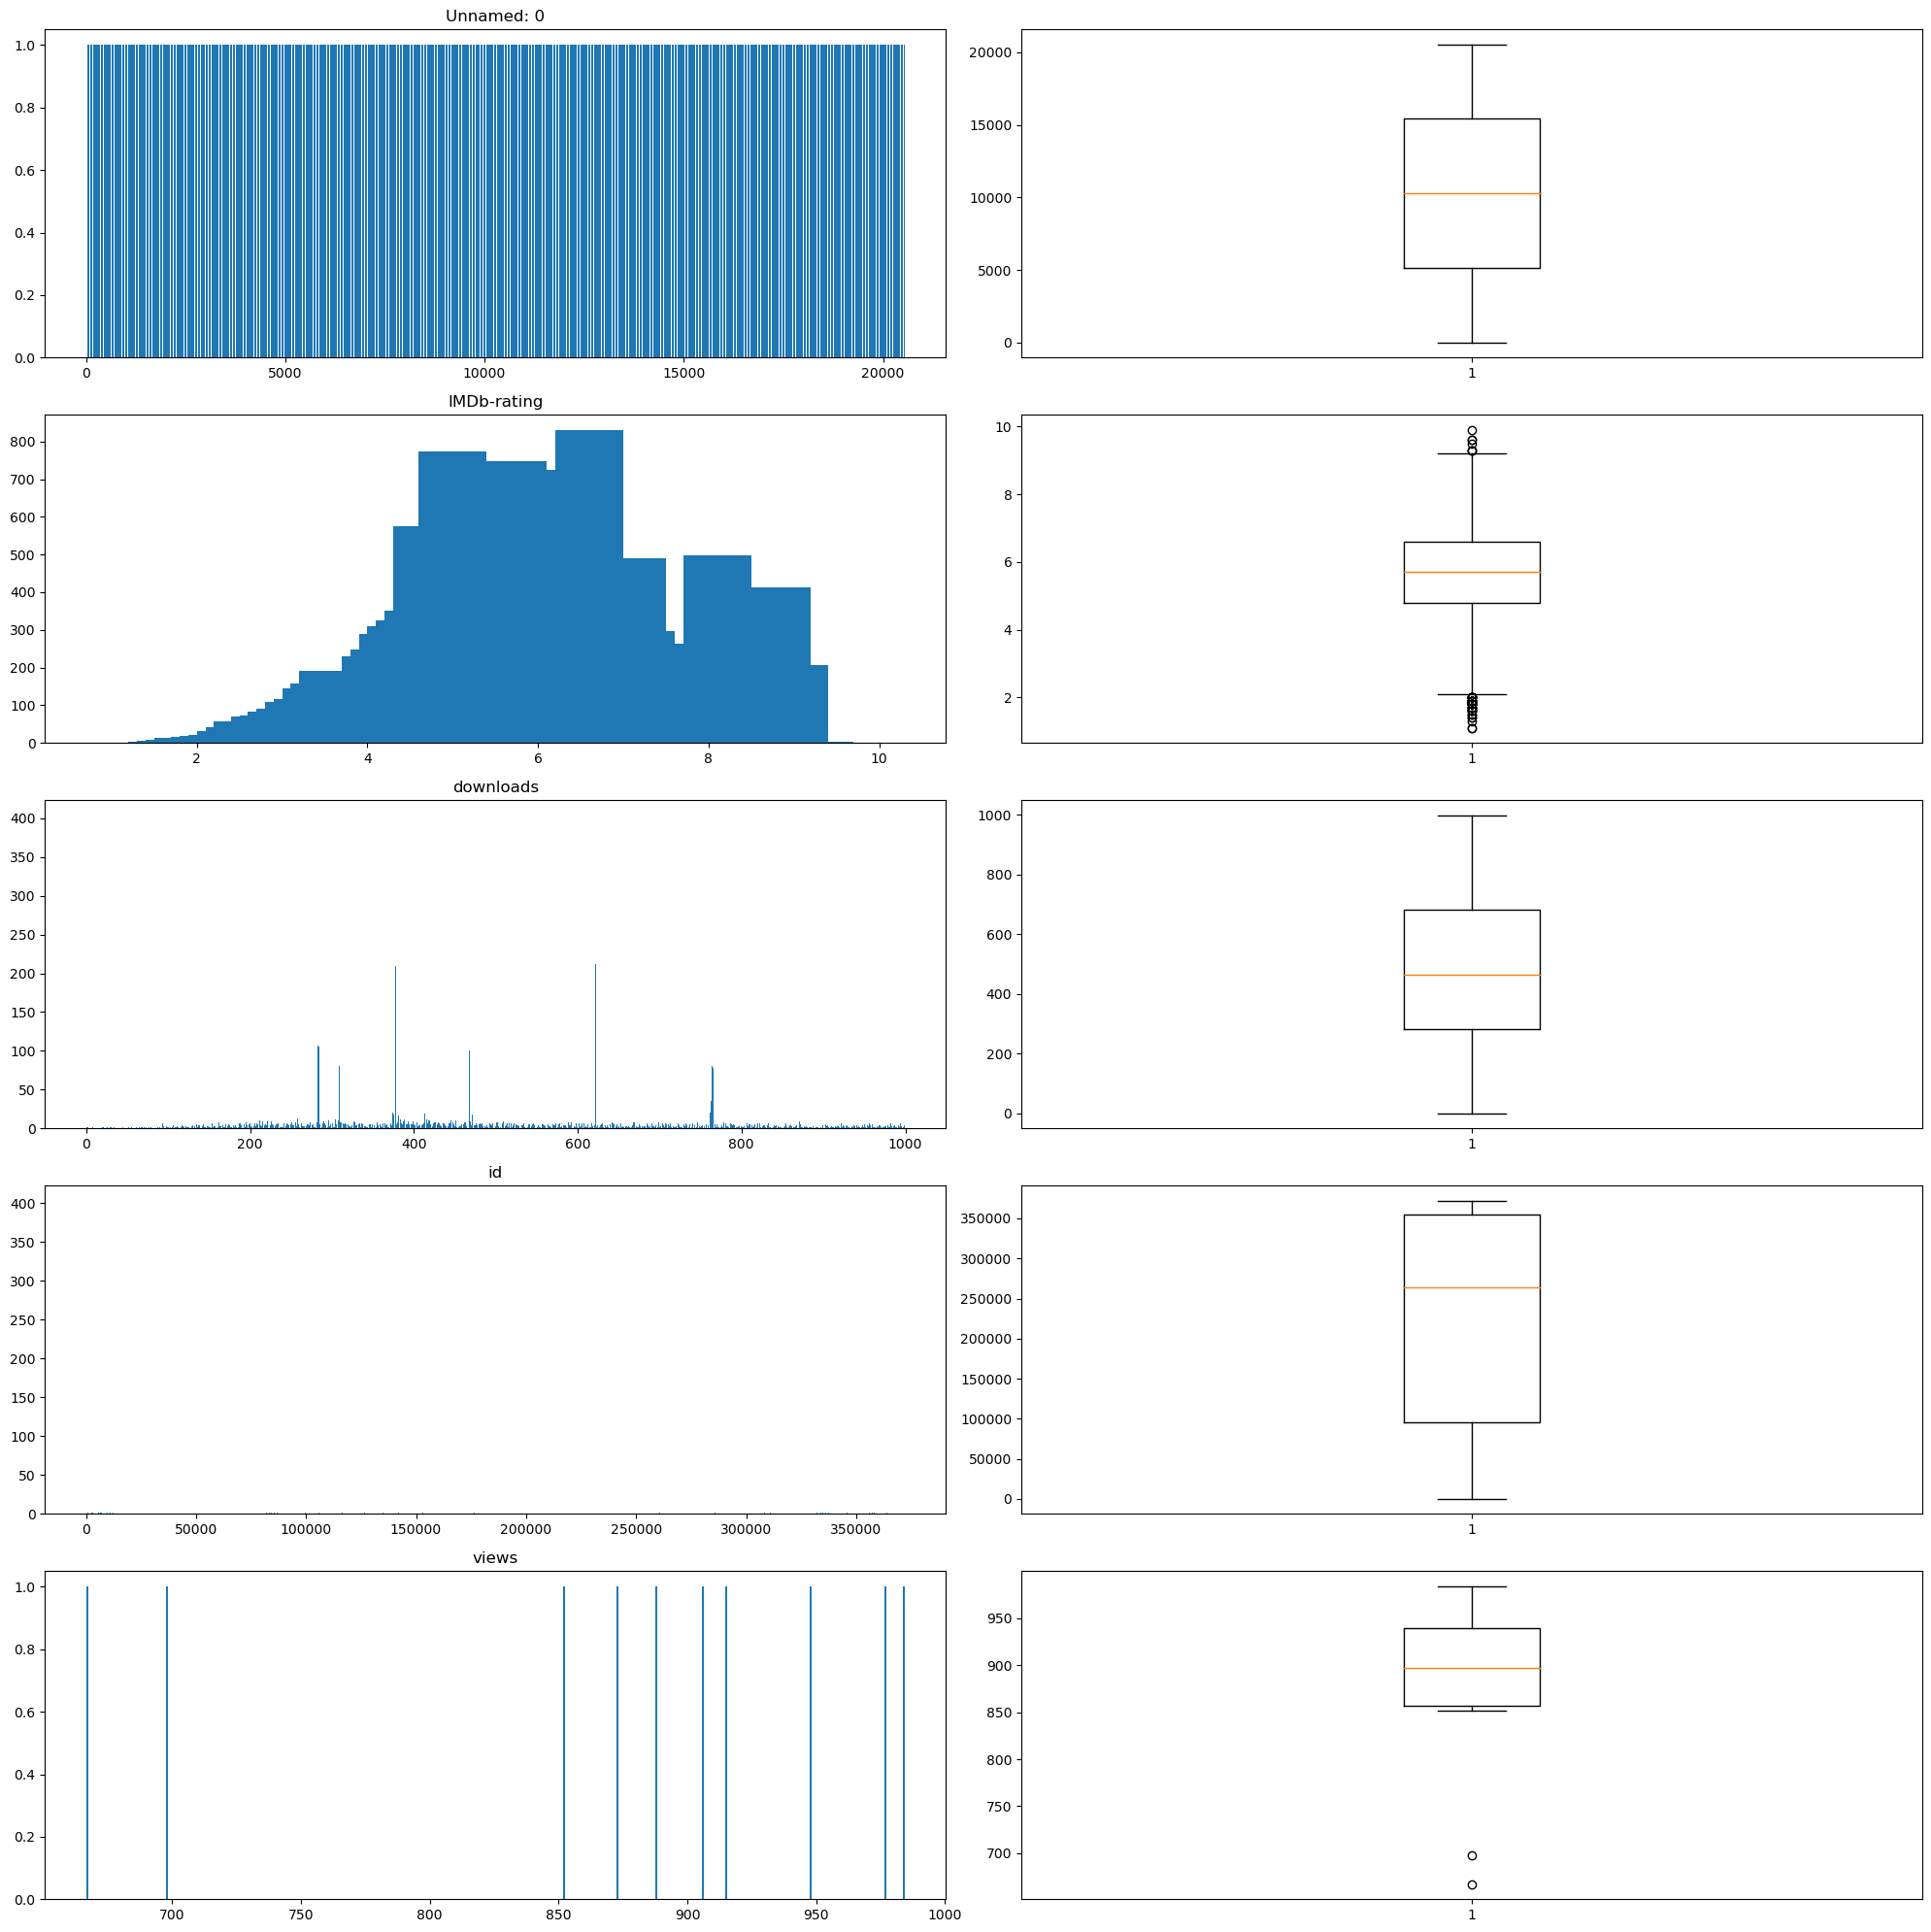

In [294]:
# 通过数据对象之间的相似性来填补缺失值
data = pd.read_csv(r'D:\学习资料\数据挖掘\movies_dataset.csv', low_memory=False)
data["downloads"] = data["downloads"].apply(pd.to_numeric, errors='coerce')
data["id"] = data["id"].apply(pd.to_numeric, errors='coerce')
data["views"] = data["views"].apply(pd.to_numeric, errors='coerce')
for j in tqdm.tqdm(range(20547)):
    if np.isnan(data["downloads"][j]):
        idx = data["id"][j]
        if len(data.loc[data["id"] == idx]) == 1:
            continue
        for k in range(0, 20000):
            if data["id"][k] == idx and ~np.isnan(data["downloads"][k]):
                data["downloads"][j] = data["downloads"][k]
                break
    if np.isnan(data["views"][j]):
        idx = data["id"][j]
        if len(data.loc[data["id"] == idx]) == 1:
            continue
        for k in range(0, 20000):
            if data["id"][k] == topic and ~np.isnan(data["views"][k]):
                data["views"][j] = data["views"][k]
                break
    if np.isnan(data["IMDb-rating"][j]):
        idx = data["id"][j]
        if len(data.loc[data["id"] == idx]) == 1:
            continue
        for k in range(0, 20000):
            if data["id"][k] == topic and ~np.isnan(data["IMDb-rating"][k]):
                data["IMDb-rating"][j] = data["IMDb-rating"][k]
                break
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = data[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(data[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(data[col][~np.isnan(data[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

### 分析
如果通过数据对象之间的相似性来填补缺失值，经过观察修改后各属性的直方图和盒图，可以看到此操作能够和通过属性的相关系填补缺失值一样很好地丰富数据，并保证基本维持原数据集的分布不变，然而由于缺失值直接参考了相似数据对象的对应属性值，因此这往往意味着重复数据的产生，不能很好地体现数据本身的特异性。